In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train_data.csv')
df.drop('id', axis=1, inplace=True)

In [6]:
df.head()

McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
0                8                           2                          1   
1            85293                           4                          4   
2               14                           2                          1   
3               19                           3                          1   
4                8                           3                          1   

   McCabeDesignComplexity  HalsteadTotalOperatorsOperands  HalsteadVolume  \
0                     1.0                              18           66.61   
1                     1.0                            3321        13848.57   
2                     2.0                              35          151.27   
3                     3.0                              38             NaN   
4                     1.0                              24           98.10   

   HalsteadProgramLength HalsteadDifficulty  HalsteadIntelligence  \
0                   0.18               5.63                   NaN   
1                   0.06              15.44                 10.91   
2                   0.14               7.31                 19.75   
3                   0.13                7.5                 21.51   
4                   0.11                9.9                  8.40   

   HalsteadEffort  ...  OperandsPerOperator  CodeAndCommentRatio  CodeAge  \
0          374.67  ...             0.384615                  inf     49.0   
1         2970.00  ...             0.826087                  inf     64.0   
2         1078.11  ...             0.590909                  inf     70.0   
3         1314.81  ...             0.652174                  5.5      NaN   
4          629.47  ...             0.846154                  inf    216.0   

   CodeLanguage CodeSizeCategory             CodeType CodeQuality  \
0          JAVA            large                  NaN           1   
1          Ruby           Medium              Library           8   
2          ruby            Large  Desktop Application           3   
3        Python            Large  Desktop Application          30   
4        Python            Small                  NaN          16   

   QualityScore  IsDeprecated  TeamSize  
0      0.228319           1.0         4  
1      0.792022           1.0         6  
2      0.725787           5.0         4  
3      3.532268           0.0        10  
4      0.732659           NaN         9  

[5 rows x 36 columns]

In [7]:
df.isnull().sum()

McCabeLineCount                        0
McCabeCyclomaticComplexity             0
McCabeEssentialComplexity              0
McCabeDesignComplexity             16328
HalsteadTotalOperatorsOperands         0
HalsteadVolume                     13718
HalsteadProgramLength                  0
HalsteadDifficulty                  7542
HalsteadIntelligence                5441
HalsteadEffort                         0
HalsteadB                              0
HalsteadTimeEstimator              13856
HalsteadLineCountCode               6229
HalsteadLineCountComment               0
HalsteadLineCountBlank             14139
HalsteadLineCountCodeAndComment     4537
UniqueOperators                    10698
UniqueOperands                         0
TotalOperators                     12735
TotalOperands                          0
BranchCount                            0
defects                                0
CodeDensity                         5712
OperatorToOperandRatio             17436
CommentDensity  

In [183]:
# Define threshold to drop columns with more than 50% missing values
threshold = len(df) * 0.5

# Drop columns with excessive missing values
df_dropped = df.dropna(thresh=threshold, axis=1)

# Fill missing values in numerical columns with the median
numerical_cols = df_dropped.select_dtypes(include=['float64', 'int64']).columns
df_dropped[numerical_cols] = df_dropped[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)
df.head()
df.shape

(38303, 36)

In [9]:
# pre - processing
numerical_cols_arr = ["HalsteadDifficulty", "HalsteadLineCountBlank", "UniqueOperators", "OperatorToOperandRatio", "ComplexityEfficiency", "CodeAndCommentRatio"]
print(numerical_cols)
print(numerical_cols_arr)

def convert_to_float(value):
        df[value] = df[value].astype(float)
        df[value].replace([np.inf, -np.inf], np.nan, inplace=True)
        df[value].replace('nan', np.nan, inplace=True)
        df[value].replace('NAN', np.nan, inplace=True)
        df[value].fillna(df[value].median(), inplace=True)

for col in numerical_cols:
    convert_to_float(col)

for i in numerical_cols_arr:
  convert_to_float(i)



Index(['McCabeLineCount', 'McCabeCyclomaticComplexity',
       'McCabeEssentialComplexity', 'McCabeDesignComplexity',
       'HalsteadTotalOperatorsOperands', 'HalsteadVolume',
       'HalsteadProgramLength', 'HalsteadIntelligence', 'HalsteadEffort',
       'HalsteadB', 'HalsteadTimeEstimator', 'HalsteadLineCountCode',
       'HalsteadLineCountComment', 'HalsteadLineCountCodeAndComment',
       'UniqueOperands', 'TotalOperators', 'TotalOperands', 'BranchCount',
       'CodeDensity', 'CommentDensity', 'OperandsPerOperator',
       'CodeAndCommentRatio', 'CodeAge', 'CodeQuality', 'QualityScore',
       'IsDeprecated', 'TeamSize'],
      dtype='object')
['HalsteadDifficulty', 'HalsteadLineCountBlank', 'UniqueOperators', 'OperatorToOperandRatio', 'ComplexityEfficiency', 'CodeAndCommentRatio']


In [10]:

# Fill missing values with the mode for each categorical column
#categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

# Replace missing values in categorical columns with the mode
for column in categorical_cols:
    df[column].replace('nan', np.nan, inplace=True)
    df[column].replace('NAN', np.nan, inplace=True)
    df[column].fillna(df[column].mode()[0], inplace=True)
    #df.dropna(inplace=True)


Index(['CodeLanguage', 'CodeSizeCategory', 'CodeType'], dtype='object')


In [11]:
# Display the final summary of missing values

print(df.isnull().sum())

McCabeLineCount                    0
McCabeCyclomaticComplexity         0
McCabeEssentialComplexity          0
McCabeDesignComplexity             0
HalsteadTotalOperatorsOperands     0
HalsteadVolume                     0
HalsteadProgramLength              0
HalsteadDifficulty                 0
HalsteadIntelligence               0
HalsteadEffort                     0
HalsteadB                          0
HalsteadTimeEstimator              0
HalsteadLineCountCode              0
HalsteadLineCountComment           0
HalsteadLineCountBlank             0
HalsteadLineCountCodeAndComment    0
UniqueOperators                    0
UniqueOperands                     0
TotalOperators                     0
TotalOperands                      0
BranchCount                        0
defects                            0
CodeDensity                        0
OperatorToOperandRatio             0
CommentDensity                     0
ComplexityEfficiency               0
OperandsPerOperator                0
C

In [12]:
def remove_nan(column):

  df[column].replace('nan', np.nan, inplace=True)
  df[column].replace('NAN', np.nan, inplace=True)
  df[column].fillna(df[column].mode()[0], inplace=True)
  #df.dropna(inplace=True)

#categorical_feature_arr = ["defects","CodeType", "CodeSizeCategory","CodeLanguage"]

for i in categorical_cols:
  remove_nan(i)

def drop_na(df, col):
  df[col].fillna(df[col].mode()[0], inplace=True)
  df.dropna(inplace=True)
  df = df.dropna(subset=[col])

#for i in categorical_cols:
  #drop_na(df, i)


In [13]:
# Fill missing values with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df.head(20)

McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
0               8.0                         2.0                        1.0   
1           85293.0                         4.0                        4.0   
2              14.0                         2.0                        1.0   
3              19.0                         3.0                        1.0   
4               8.0                         3.0                        1.0   
5              24.0                         6.0                       36.0   
6              29.0                         3.0                        1.0   
7              34.0                        11.0                        7.0   
8          295245.0                         6.0                      180.0   
9              17.0                         1.0                        1.0   
10             18.0                         3.0                        3.0   
11             80.0                         8.0                        4.0   
12             15.0                         3.0                        1.0   
13             19.0                         4.0                        4.0   
14             41.0                         5.0                        1.0   
15             25.0                         2.0                       36.0   
16             14.0                         1.0                        1.0   
17             10.0                         2.0                        1.0   
18             96.0                         5.0                        1.0   
19             88.0                        18.0                       10.0   

    McCabeDesignComplexity  HalsteadTotalOperatorsOperands  HalsteadVolume  \
0                      1.0                            18.0           66.61   
1                      1.0                          3321.0        13848.57   
2                      2.0                            35.0          151.27   
3                      3.0                            38.0          266.89   
4                      1.0                            24.0           98.10   
5                     72.0                            56.0          260.06   
6                      3.0                            65.0          318.95   
7                     11.0                             0.0            0.00   
8                      2.0                           149.0          787.52   
9                      1.0                          3969.0        18655.92   
10                     1.0                            42.0          189.99   
11                     3.0                             0.0            0.00   
12                     2.0                            54.0          262.37   
13                     2.0                            48.0          240.00   
14                     2.0                           145.0          805.42   
15                    72.0                           119.0          605.41   
16                     1.0                            35.0          130.80   
17                     2.0                            30.0          131.77   
18                     1.0                           623.0         3805.61   
19                    12.0                           300.0          266.89   

    HalsteadProgramLength  HalsteadDifficulty  HalsteadIntelligence  \
0                    0.18                5.63                 25.77   
1                    0.06               15.44                 10.91   
2                    0.14                7.31                 19.75   
3                    0.13                7.50                 21.51   
4                    0.11                9.90                  8.40   
5                    0.09               10.29                 26.35   
6                    0.09               11.00                 26.07   
7                    0.00                0.00                  0.00   
8                    0.06               16.69                 44.86   
9               

In [14]:
df.isnull().sum()

McCabeLineCount                    0
McCabeCyclomaticComplexity         0
McCabeEssentialComplexity          0
McCabeDesignComplexity             0
HalsteadTotalOperatorsOperands     0
HalsteadVolume                     0
HalsteadProgramLength              0
HalsteadDifficulty                 0
HalsteadIntelligence               0
HalsteadEffort                     0
HalsteadB                          0
HalsteadTimeEstimator              0
HalsteadLineCountCode              0
HalsteadLineCountComment           0
HalsteadLineCountBlank             0
HalsteadLineCountCodeAndComment    0
UniqueOperators                    0
UniqueOperands                     0
TotalOperators                     0
TotalOperands                      0
BranchCount                        0
defects                            0
CodeDensity                        0
OperatorToOperandRatio             0
CommentDensity                     0
ComplexityEfficiency               0
OperandsPerOperator                0
C

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74795 entries, 0 to 74794
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   McCabeLineCount                  74795 non-null  float64
 1   McCabeCyclomaticComplexity       74795 non-null  float64
 2   McCabeEssentialComplexity        74795 non-null  float64
 3   McCabeDesignComplexity           74795 non-null  float64
 4   HalsteadTotalOperatorsOperands   74795 non-null  float64
 5   HalsteadVolume                   74795 non-null  float64
 6   HalsteadProgramLength            74795 non-null  float64
 7   HalsteadDifficulty               74795 non-null  float64
 8   HalsteadIntelligence             74795 non-null  float64
 9   HalsteadEffort                   74795 non-null  float64
 10  HalsteadB                        74795 non-null  float64
 11  HalsteadTimeEstimator            74795 non-null  float64
 12  HalsteadLineCountC

In [16]:
# Pre-processing - to lower
def to_lower(cols):
  df[cols]= df[cols].astype(str)
  df[cols]= df[cols].str.lower()
  df[cols].head()

for i in categorical_cols:
  to_lower(i)


In [17]:
df.head()

McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
0              8.0                         2.0                        1.0   
1          85293.0                         4.0                        4.0   
2             14.0                         2.0                        1.0   
3             19.0                         3.0                        1.0   
4              8.0                         3.0                        1.0   

   McCabeDesignComplexity  HalsteadTotalOperatorsOperands  HalsteadVolume  \
0                     1.0                            18.0           66.61   
1                     1.0                          3321.0        13848.57   
2                     2.0                            35.0          151.27   
3                     3.0                            38.0          266.89   
4                     1.0                            24.0           98.10   

   HalsteadProgramLength  HalsteadDifficulty  HalsteadIntelligence  \
0                   0.18                5.63                 25.77   
1                   0.06               15.44                 10.91   
2                   0.14                7.31                 19.75   
3                   0.13                7.50                 21.51   
4                   0.11                9.90                  8.40   

   HalsteadEffort  ...  OperandsPerOperator  CodeAndCommentRatio  CodeAge  \
0          374.67  ...             0.384615                 10.0     49.0   
1         2970.00  ...             0.826087                 10.0     64.0   
2         1078.11  ...             0.590909                 10.0     70.0   
3         1314.81  ...             0.652174                  5.5     75.0   
4          629.47  ...             0.846154                 10.0    216.0   

   CodeLanguage  CodeSizeCategory             CodeType  CodeQuality  \
0          java             large      web application          1.0   
1          ruby            medium              library          8.0   
2          ruby             large  desktop application          3.0   
3        python             large  desktop application         30.0   
4        python             small      web application         16.0   

   QualityScore  IsDeprecated  TeamSize  
0      0.228319           1.0       4.0  
1      0.792022           1.0       6.0  
2      0.725787           5.0       4.0  
3      3.532268           0.0      10.0  
4      0.732659           1.0       9.0  

[5 rows x 36 columns]

In [18]:
def value_counts(cols):
  df[cols].value_counts()
  print(df[cols].value_counts())

for i in categorical_cols:
  value_counts(i)


CodeLanguage
java          15088
ruby          15063
python        14952
javascript    14914
c++           14778
Name: count, dtype: int64
CodeSizeCategory
large     35264
small     19848
medium    19683
Name: count, dtype: int64
CodeType
web application        31902
library                21468
desktop application    21425
Name: count, dtype: int64


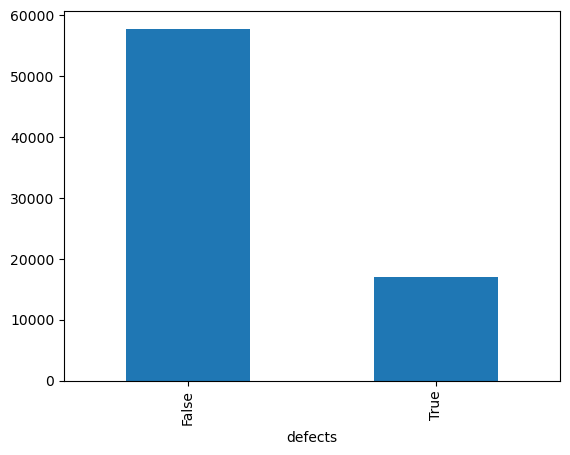

In [19]:
def value_counts_plot(cols):
  df[cols].value_counts(normalize=False).plot(kind="bar")
  #plt.ylim(0, 20000)
  plt.show()

value_counts_plot('defects')


In [117]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
# Normalize numerical variables
scaler = StandardScaler()
for col in numerical_cols:
    df[col] = scaler.fit_transform(df[[col]])
#df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [119]:
# One-Hot Encoding for categorical columns
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#df_encoded.head()

from sklearn.preprocessing import LabelEncoder

def label_encoding(value):
   le=LabelEncoder()
   df[value]=le.fit_transform(df[value])

for i in categorical_cols:
  label_encoding(i)


In [120]:
df.head()

McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
0        -0.155456                   -0.266179                  -0.226359   
1         6.404577                   -0.197120                  -0.143243   
2        -0.154846                   -0.266179                  -0.226359   
3        -0.154337                   -0.231649                  -0.226359   
4        -0.155456                   -0.231649                  -0.226359   

   McCabeDesignComplexity  HalsteadTotalOperatorsOperands  HalsteadVolume  \
0               -0.253095                       -0.286987       -0.290022   
1               -0.253095                        3.017039        3.622179   
2               -0.225586                       -0.268951       -0.263582   
3               -0.198077                       -0.265769       -0.227528   
4               -0.253095                       -0.280620       -0.280183   

   HalsteadProgramLength  HalsteadDifficulty  HalsteadIntelligence  \
0              -0.146504           -0.447927             -0.205468   
1              -0.200560            0.045417             -0.318559   
2              -0.164523           -0.363440             -0.251144   
3              -0.169027           -0.353885             -0.237771   
4              -0.178036           -0.233189             -0.337776   

   HalsteadEffort  ...  OperandsPerOperator  CodeAndCommentRatio   CodeAge  \
0       -0.257147  ...            -0.550206            -0.152212 -0.455122   
1       -0.228191  ...            -0.277400            -0.152212 -0.323050   
2       -0.249296  ...            -0.422727            -0.152212 -0.271103   
3       -0.246655  ...            -0.384869            -0.418913 -0.228188   
4       -0.254303  ...            -0.264999            -0.152212  0.860992   

   CodeLanguage  CodeSizeCategory  CodeType  CodeQuality  QualityScore  \
0             1                 0         2    -0.664422     -0.558463   
1             4                 1         1    -0.157343     -0.089081   
2             4                 0         0    -0.519542     -0.144234   
3             3                 0         0     1.436335      2.192657   
4             3                 2         2     0.422176     -0.138512   

   IsDeprecated  TeamSize  
0      0.066609 -0.392368  
1      0.066609 -0.294916  
2      2.688284 -0.392368  
3     -0.588810 -0.100014  
4      0.066609 -0.148740  

[5 rows x 36 columns]

In [121]:
df[numerical_cols].describe()

McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
count     6.209900e+04                6.209900e+04               6.209900e+04   
mean     -2.025251e-17                3.203787e-18              -1.075557e-17   
std       1.000008e+00                1.000008e+00               1.000008e+00   
min      -1.561692e-01               -3.007084e-01              -2.263591e-01   
25%      -1.550492e-01               -2.661789e-01              -2.263591e-01   
50%      -1.541329e-01               -2.316495e-01              -2.263591e-01   
75%      -1.521987e-01               -1.280612e-01              -1.432433e-01   
max       8.871376e+00                9.816415e+00               3.465455e+01   

       McCabeDesignComplexity  HalsteadTotalOperatorsOperands  HalsteadVolume  \
count            6.209900e+04                    6.209900e+04    6.209900e+04   
mean            -3.432629e-18                   -4.347997e-18    1.144210e-17   
std              1.000008e+00                    1.000008e+00    1.000008e+00   
min             -2.530946e-01                   -3.060974e-01   -3.108485e-01   
25%             -2.255859e-01                   -2.806203e-01   -2.738998e-01   
50%             -2.255859e-01                   -2.530460e-01   -2.275276e-01   
75%             -1.980772e-01                   -1.831708e-01   -1.610069e-01   
max              2.150632e+01                    1.095319e+01    1.015386e+01   

       HalsteadProgramLength  HalsteadIntelligence  HalsteadEffort  \
count           6.209900e+04          6.209900e+04    6.209900e+04   
mean           -6.064311e-18         -2.974945e-18    3.890313e-18   
std             1.000008e+00          1.000008e+00    1.000008e+00   
min            -2.275874e-01         -4.023293e-01   -2.613299e-01   
25%            -2.050642e-01         -2.775582e-01   -2.548791e-01   
50%            -1.825411e-01         -2.071342e-01   -2.351174e-01   
75%            -1.510087e-01         -1.262479e-01   -1.414790e-01   
max             1.801615e+01          8.739850e+00    1.330406e+01   

          HalsteadB  ...   BranchCount   CodeDensity  CommentDensity  \
count  6.209900e+04  ...  62099.000000  6.209900e+04    6.209900e+04   
mean  -1.144210e-18  ...      0.000000  6.521995e-18   -5.721048e-18   
std    1.000008e+00  ...      1.000008  1.000008e+00    1.000008e+00   
min   -2.278581e-01  ...     -0.394742 -6.086017e-01   -2.718525e-01   
25%   -2.114876e-01  ...     -0.351842 -3.789727e-01   -2.718525e-01   
50%   -1.842035e-01  ...     -0.266042 -2.844196e-01   -2.718525e-01   
75%   -1.078078e-01  ...     -0.051542 -1.223285e-01   -2.718525e-01   
max    2.354211e+01  ...     15.606954  1.203450e+01    1.325996e+01   

       OperandsPerOperator  CodeAndCommentRatio       CodeAge   CodeQuality  \
count         6.209900e+04         6.209900e+04  6.209900e+04  6.209900e+04   
mean         -1.189978e-17         7.351547e-18 -2.746103e-18  5.492206e-18   
std           1.000008e+00         1.000008e+00  1.000008e+00  1.000008e+00   
min          -7.878782e-01        -7.448820e-01 -8.524661e-01 -6.644222e-01   
25%          -4.076026e-01        -1.522116e-01 -4.729760e-01 -4.471025e-01   
50%          -3.464868e-01        -1.522116e-01 -2.281878e-01 -3.022227e-01   
75%          -2.780290e-01        -1.522116e-01 -3.501279e-02 -8.490303e-02   
max           1.122777e+01         1.703523e+01  4.518871e+00  8.318125e+00   

       QualityScore  IsDeprecated      TeamSize  
count  6.209900e+04  6.209900e+04  6.209900e+04  
mean   5.148943e-18  1.830735e-18 -3.661471e-18  
std    1.000008e+00  1.000008e+00  1.000008e+00  
min   -7.485464e-01 -5.888097e-01 -5.385445e-01  
25%   -5.079816e-01 -5.888097e-01 -4.410932e-01  
50%   -2.685855e-01  6.660892e-02 -2.949164e-01  
75%   -2.726374e-02  6.660892e-02 -1.487395e-01  
max    9.414772e+00  4.654539e+00  1.373806e+01  

[8 rows x 27 columns]

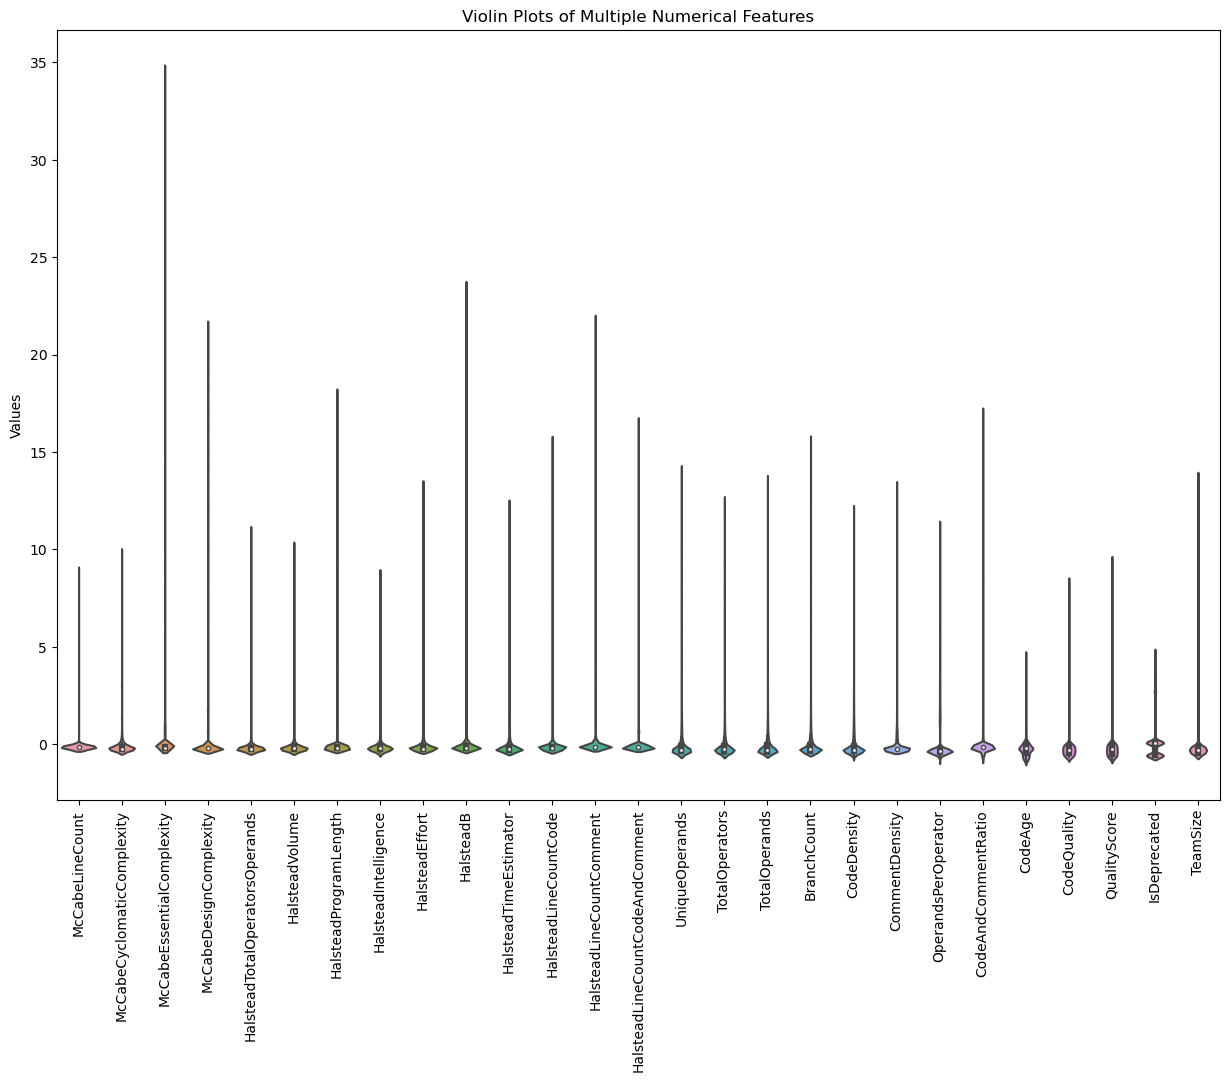

In [122]:
#Create violin plots for each feature
plt.figure(figsize=(15, 10))
sns.violinplot(data=df[numerical_cols])
plt.title("Violin Plots of Multiple Numerical Features")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

McCabeLineCount                       Axes(0.125,0.847647;0.032563x0.0323529)
McCabeCyclomaticComplexity         Axes(0.164076,0.847647;0.032563x0.0323529)
McCabeEssentialComplexity          Axes(0.203151,0.847647;0.032563x0.0323529)
McCabeDesignComplexity             Axes(0.242227,0.847647;0.032563x0.0323529)
HalsteadTotalOperatorsOperands     Axes(0.281303,0.847647;0.032563x0.0323529)
HalsteadVolume                     Axes(0.320378,0.847647;0.032563x0.0323529)
HalsteadProgramLength              Axes(0.359454,0.847647;0.032563x0.0323529)
HalsteadDifficulty                 Axes(0.398529,0.847647;0.032563x0.0323529)
HalsteadIntelligence               Axes(0.437605,0.847647;0.032563x0.0323529)
HalsteadEffort                     Axes(0.476681,0.847647;0.032563x0.0323529)
HalsteadB                          Axes(0.515756,0.847647;0.032563x0.0323529)
HalsteadTimeEstimator              Axes(0.554832,0.847647;0.032563x0.0323529)
HalsteadLineCountCode              Axes(0.593908,0.847647;0.0325

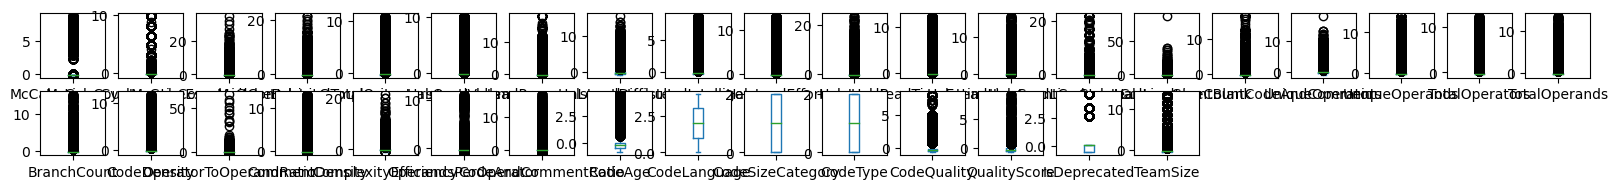

In [123]:
# Box plot of all features
import seaborn as sns
df.plot(subplots=True,kind="box",layout=(20,20),figsize=(20,20))

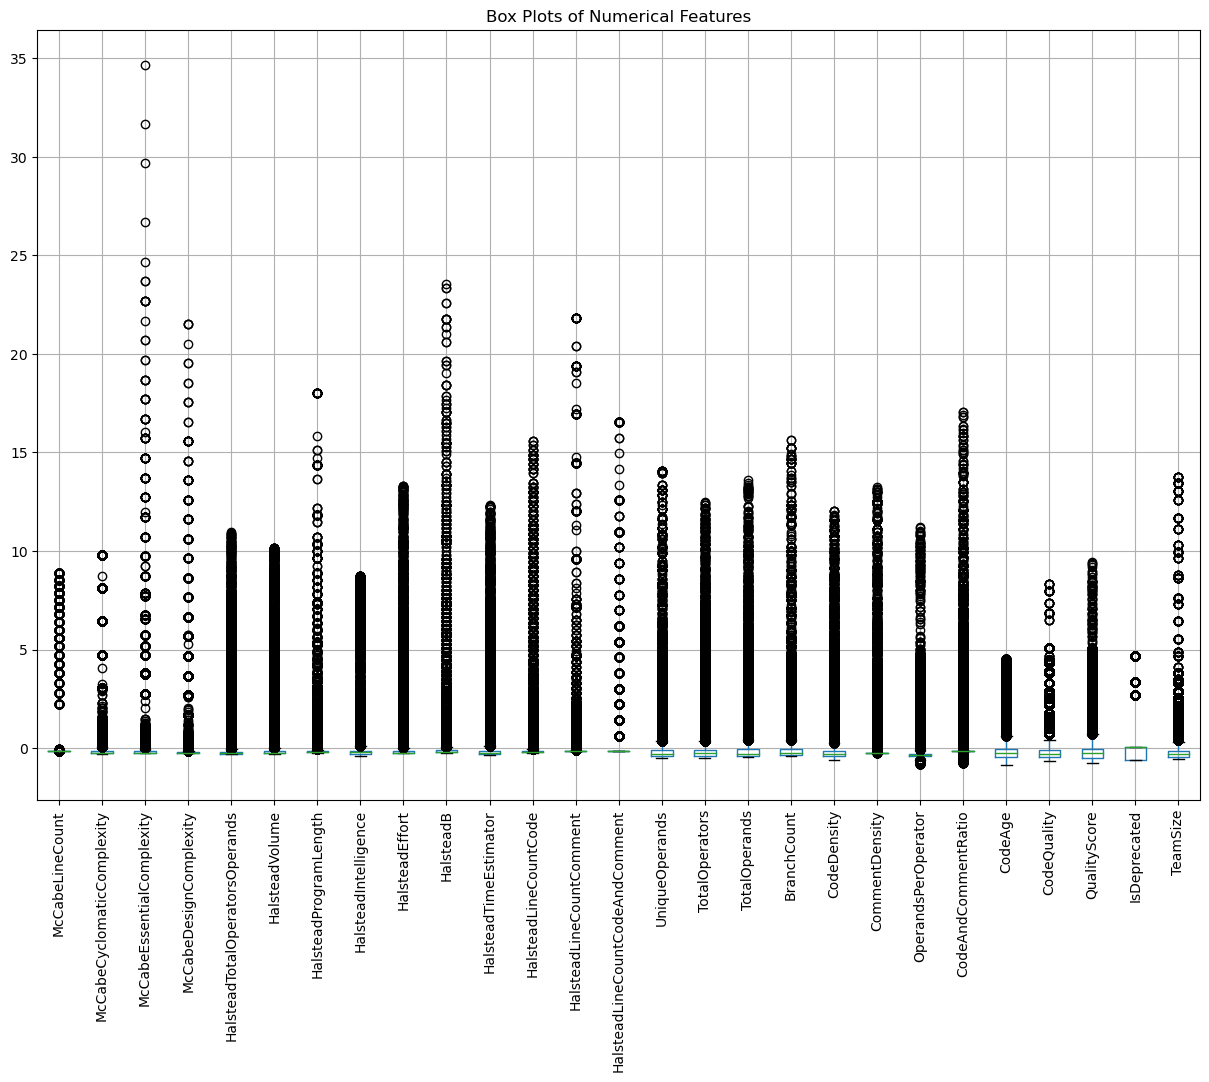

In [124]:
# Create box plots for all numerical values
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df[numerical_cols].boxplot()
#sns.boxplot(data=df, y= 'HalsteadEffort')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Box Plots of Numerical Features')
plt.show()

In [125]:
#Picking features with highest variability
high_variability_features = ["McCabeLineCount", "HalsteadEffort", "HalsteadVolume", "HalsteadTotalOperatorsOperands","HalsteadTimeEstimator","HalsteadIntelligence","CodeAge"]

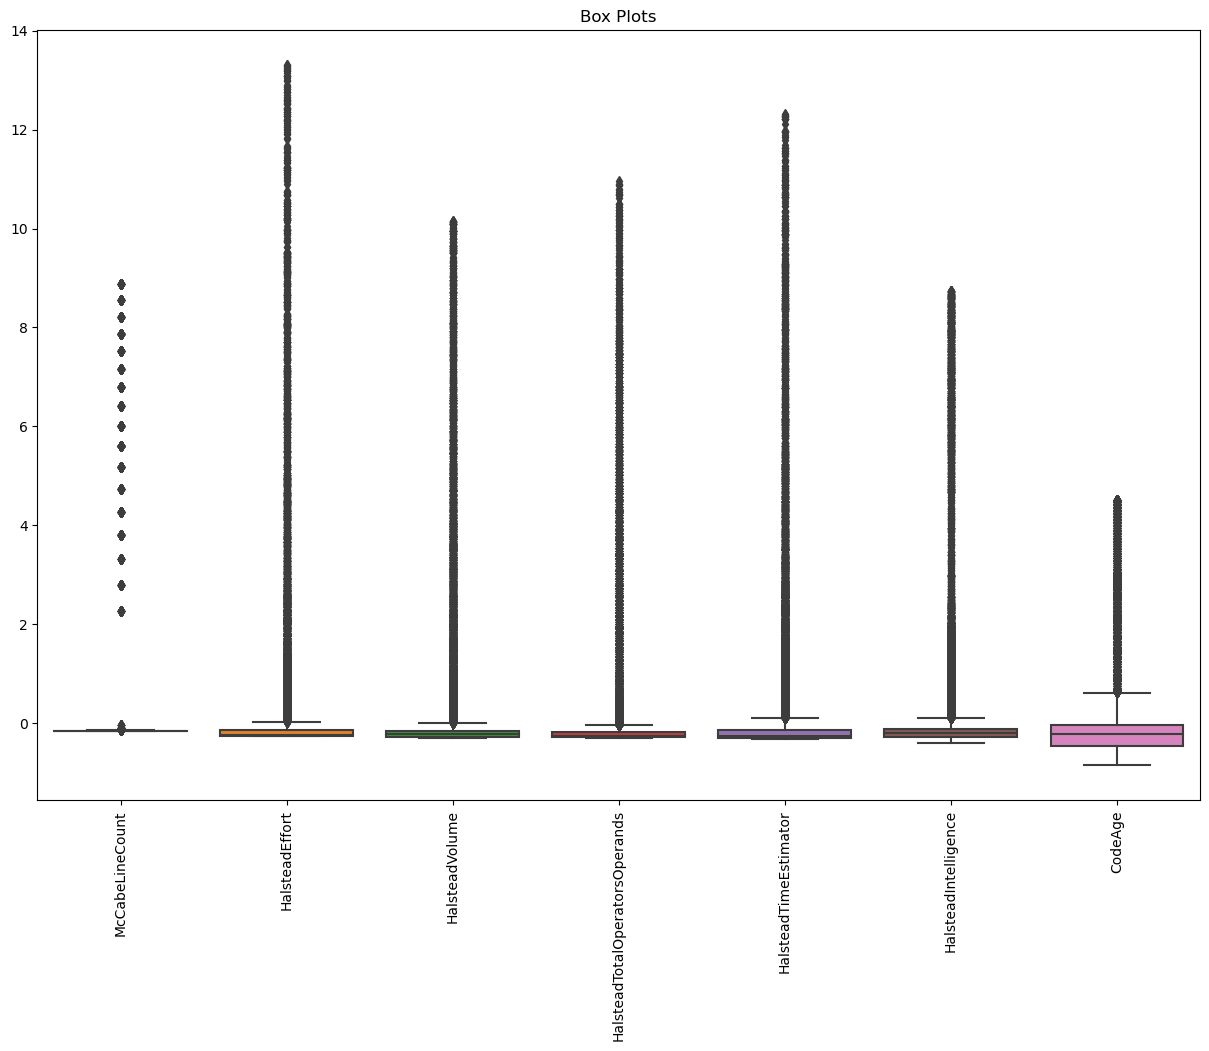

In [126]:

# Show box plot of features with highest variability
def show_all_boxplots(array):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[array])
    plt.title(f'Box Plots')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()


show_all_boxplots(high_variability_features)


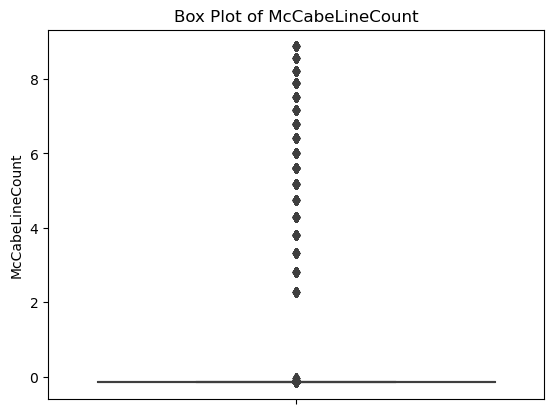

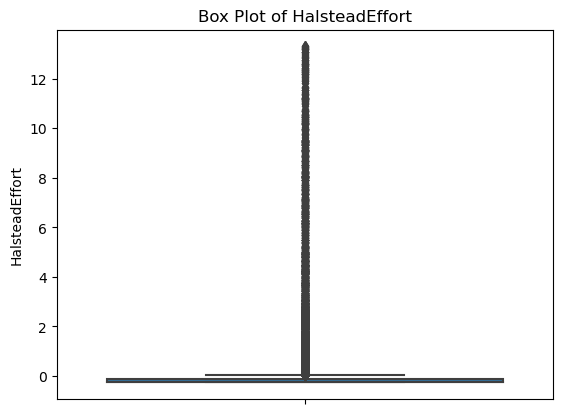

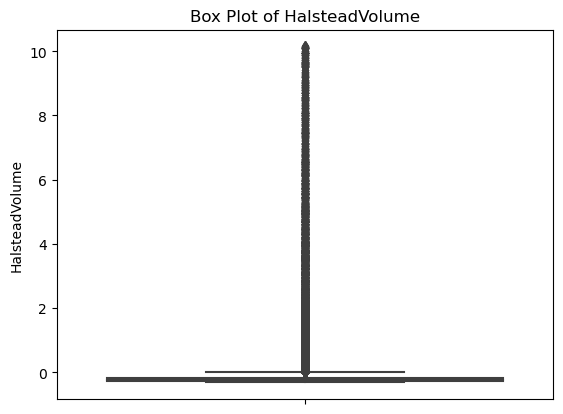

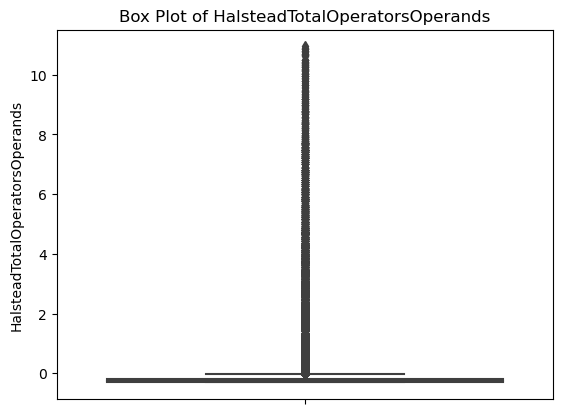

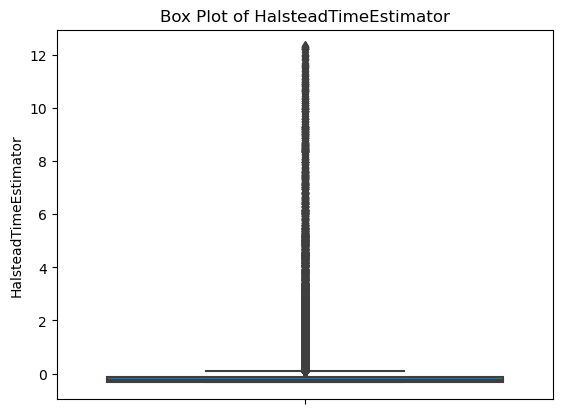

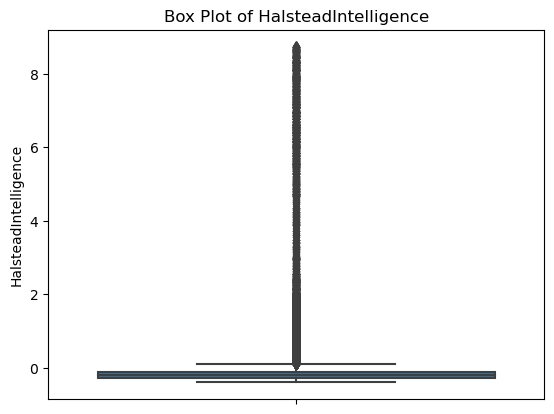

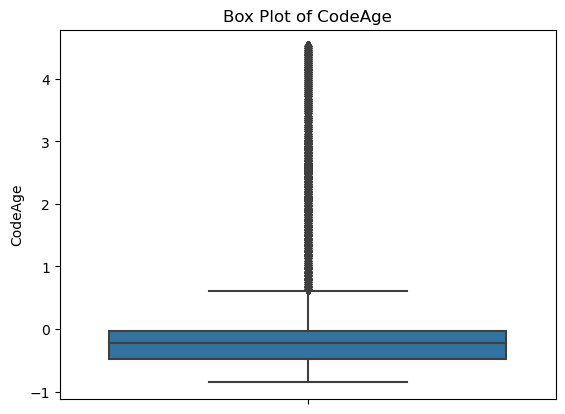

In [127]:
# Individual box plots
def show_boxplot(column):
  sns.boxplot(data=df, y=column)
  plt.title(f'Box Plot of {column}')
  plt.xticks(rotation=90)  # Rotate x-axis labels for readability
  plt.show()

for i in high_variability_features:
  show_boxplot(i)


In [128]:
import numpy as np

outlier_indices = {}
for feature in numerical_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()

# Print outliers for each feature
for feature, indices in outlier_indices.items():
    print(f"Outliers in {feature}: {indices}")



Outliers in McCabeLineCount: [1, 18, 19, 26, 61, 64, 67, 71, 82, 103, 142, 146, 148, 156, 164, 185, 203, 205, 215, 250, 263, 267, 271, 274, 305, 309, 317, 321, 344, 351, 362, 399, 406, 410, 413, 429, 431, 441, 447, 502, 504, 516, 526, 532, 547, 549, 550, 551, 567, 572, 579, 580, 581, 592, 601, 608, 617, 637, 679, 683, 692, 703, 739, 742, 743, 750, 752, 754, 770, 784, 793, 819, 838, 841, 845, 853, 866, 880, 893, 898, 910, 911, 932, 944, 945, 955, 961, 968, 975, 976, 978, 981, 997, 1031, 1049, 1051, 1058, 1065, 1066, 1068, 1098, 1124, 1148, 1172, 1182, 1186, 1207, 1215, 1269, 1301, 1335, 1351, 1371, 1388, 1406, 1407, 1426, 1428, 1430, 1433, 1437, 1439, 1441, 1446, 1463, 1469, 1480, 1501, 1504, 1512, 1516, 1545, 1553, 1562, 1567, 1576, 1585, 1588, 1589, 1594, 1607, 1616, 1628, 1640, 1642, 1643, 1653, 1656, 1677, 1685, 1696, 1701, 1702, 1726, 1749, 1759, 1760, 1777, 1785, 1786, 1789, 1810, 1811, 1817, 1828, 1843, 1851, 1859, 1879, 1894, 1896, 1923, 1928, 1947, 1954, 1993, 2001, 2014, 2022,

In [129]:
# Remove outliers

# # Create a list to store indices of all outliers
# all_outlier_indices = []
# for indices in outlier_indices.values():
#     all_outlier_indices.extend(indices)

# # Remove duplicates (if any)
# all_outlier_indices = list(set(all_outlier_indices))

# # Drop the rows with outlier indices
# df_cleaned = df.drop(all_outlier_indices)

# print(f"Original DataFrame shape: {df.shape}")
# print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

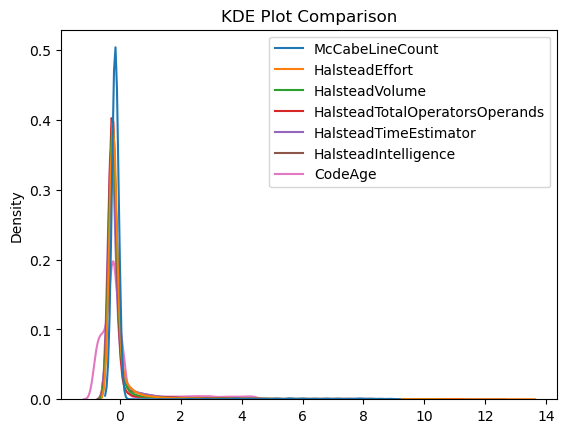

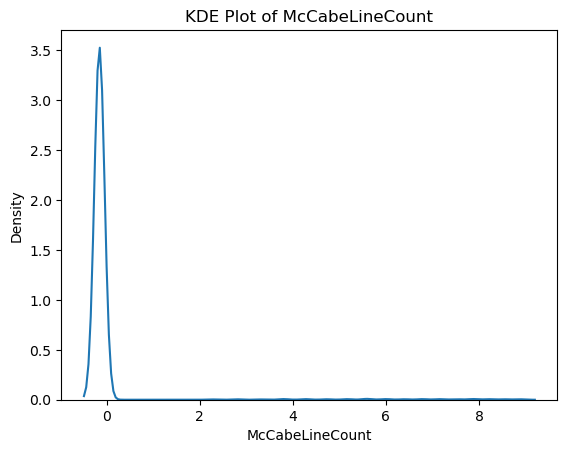

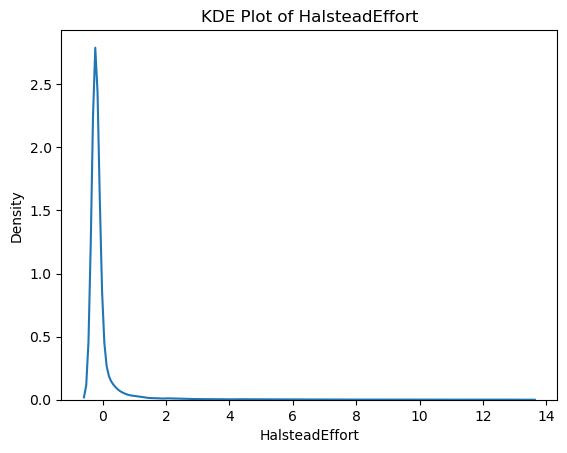

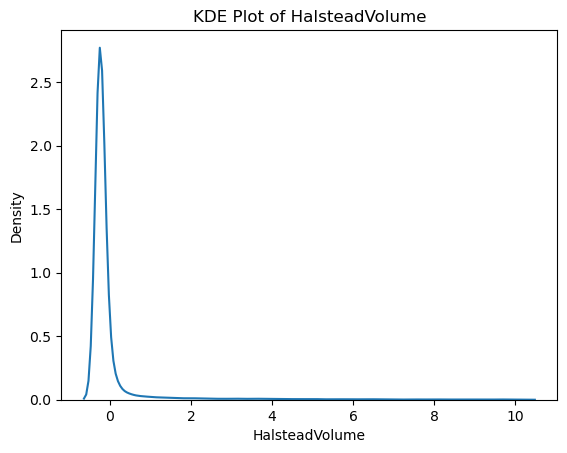

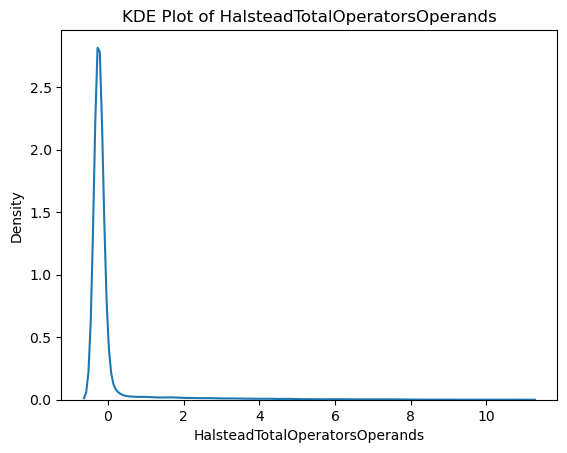

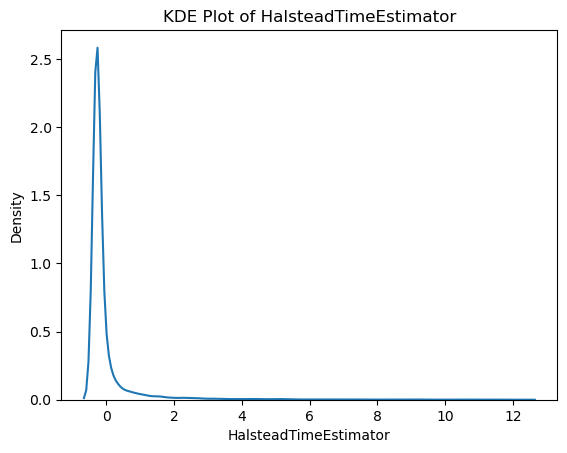

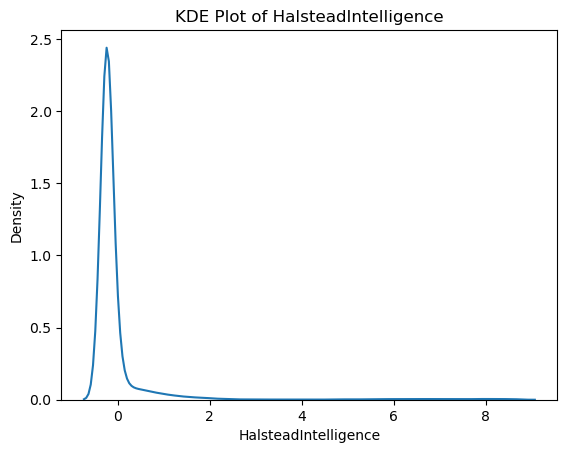

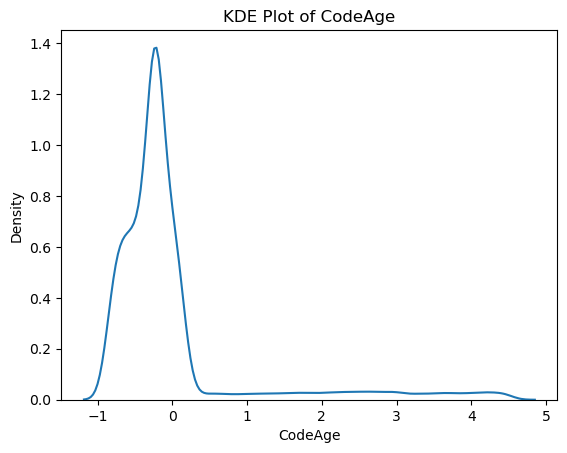

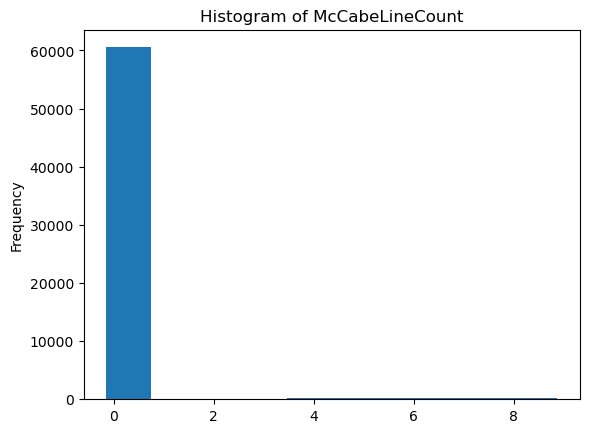

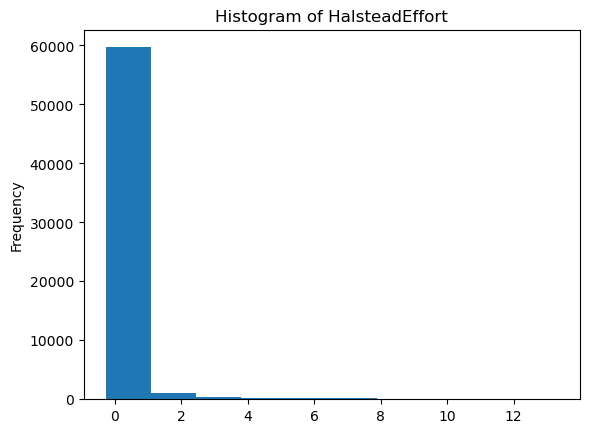

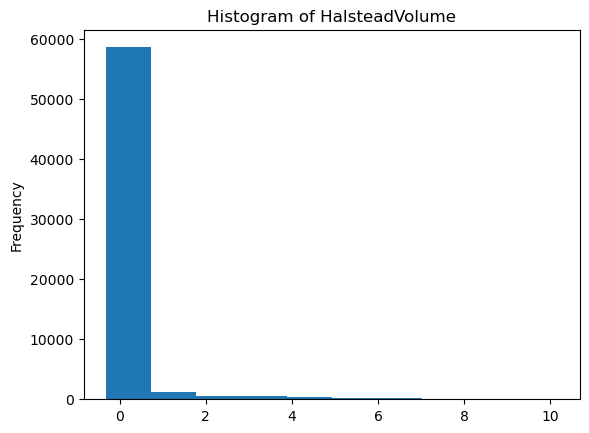

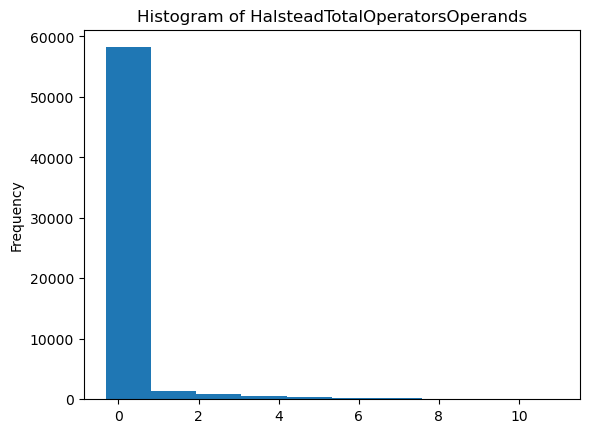

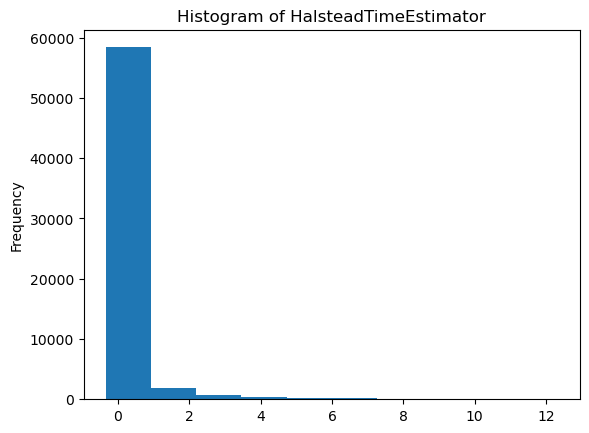

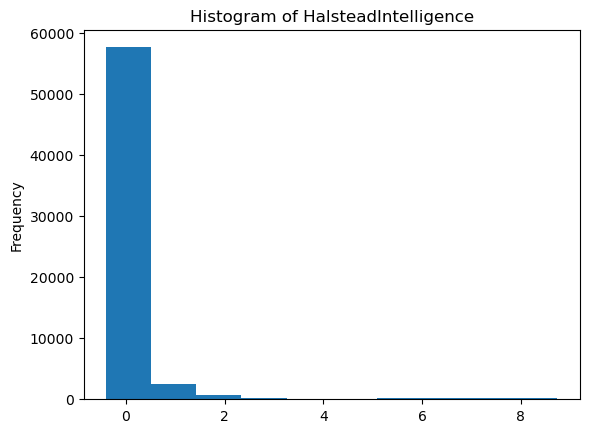

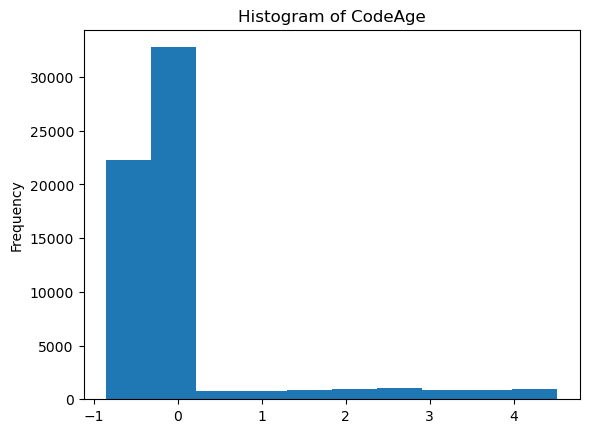

Skewness of McCabeLineCount: 6.819252237497018
Skewness of HalsteadEffort: 7.7062262819206815
Skewness of HalsteadVolume: 6.089922793129366
Skewness of HalsteadTotalOperatorsOperands: 5.537410814739726
Skewness of HalsteadTimeEstimator: 6.383835282291489
Skewness of HalsteadIntelligence: 6.223621886812523
Skewness of CodeAge: 2.8088839120962246


In [130]:
# KDE Plot
def create_kde_plot(column):
  sns.kdeplot(data=df[high_variability_features])
  plt.title('KDE Plot Comparison')
  plt.show()

def create_kde_plot_single(column):
  sns.kdeplot(data=df[column])
  plt.title(f'KDE Plot of {column}')
  plt.show()

create_kde_plot(high_variability_features)
for i in high_variability_features:
  create_kde_plot_single(i)

# Histogram
def create_hist_plot(column):
  df[column].plot.hist()
  plt.title(f'Histogram of {column}')
  plt.show()

for i in high_variability_features:
  create_hist_plot(i)

# Skewness
def calculate_skewness(column):
  skewness_value = df[column].skew()
  print(f"Skewness of {column}: {skewness_value}")

for i in high_variability_features:
  calculate_skewness(i)


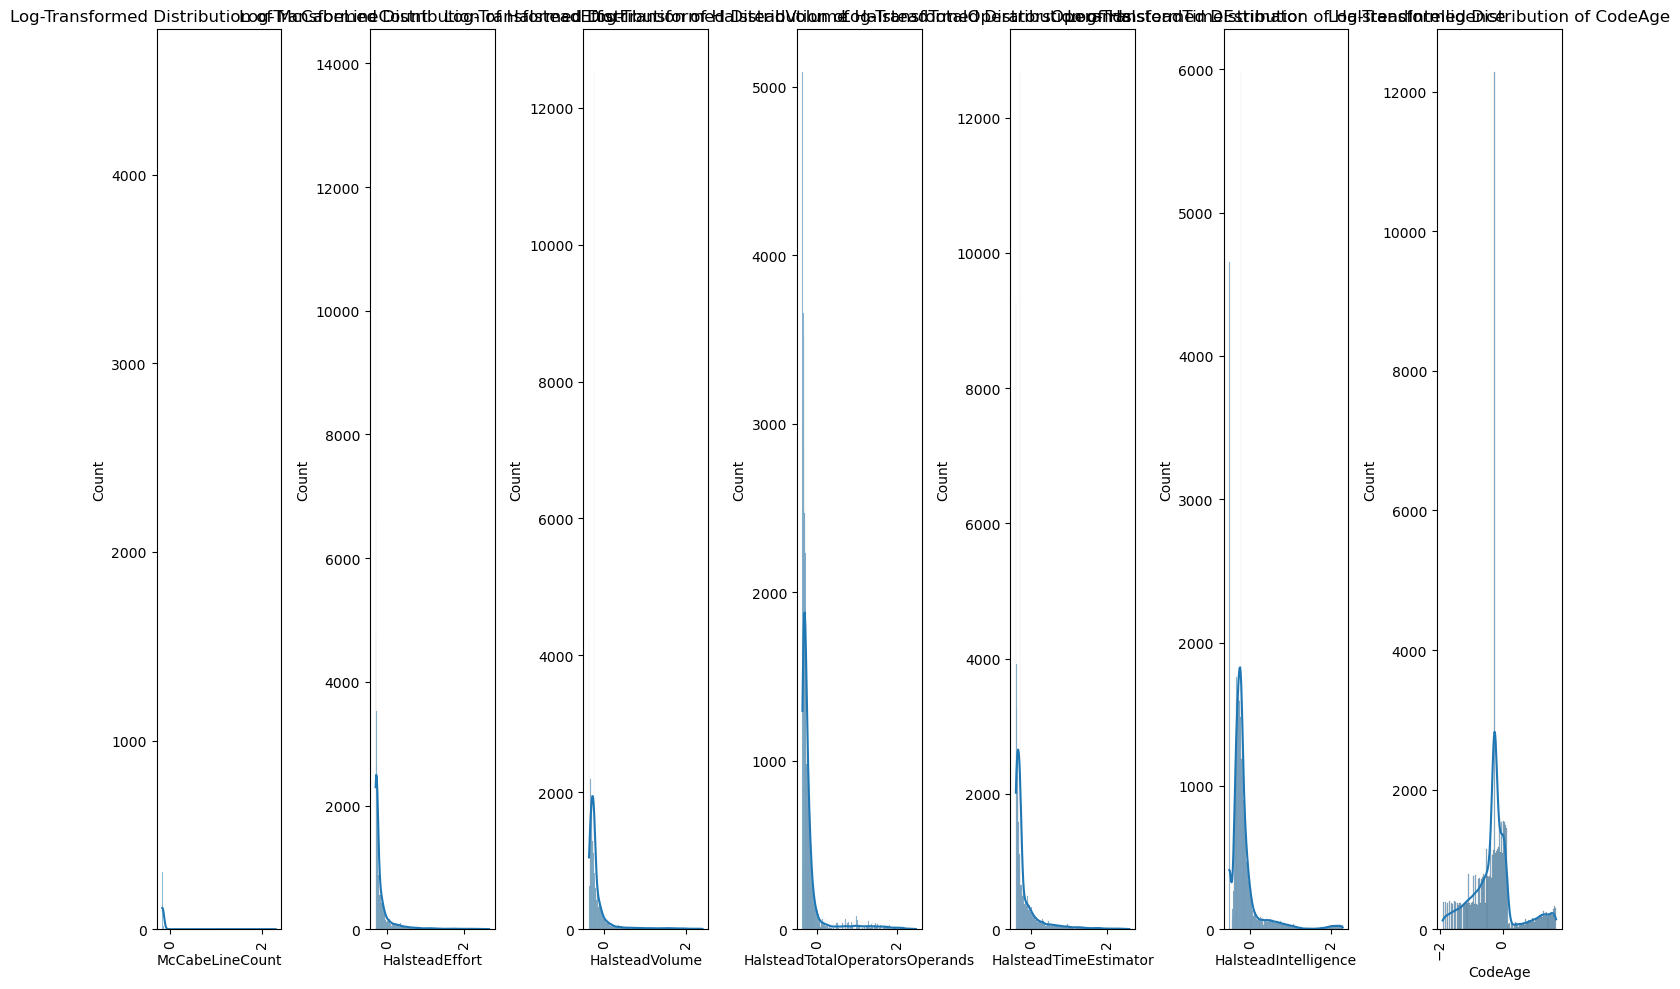

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation (adding 1 to avoid log(0) issues)
for feature in high_variability_features:
    df[feature] = np.log1p(df[feature])

#visualize the transformed distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(high_variability_features):
    plt.subplot(1, len(high_variability_features), i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Log-Transformed Distribution of {feature}")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [132]:
# Calculate skewness for each transformed feature
skewness_after_log = df[high_variability_features].skew()

# Print the results
print(skewness_after_log)

McCabeLineCount                   6.267546
HalsteadEffort                    3.977018
HalsteadVolume                    3.761109
HalsteadTotalOperatorsOperands    3.585214
HalsteadTimeEstimator             3.128189
HalsteadIntelligence              3.490347
CodeAge                           0.511582
dtype: float64


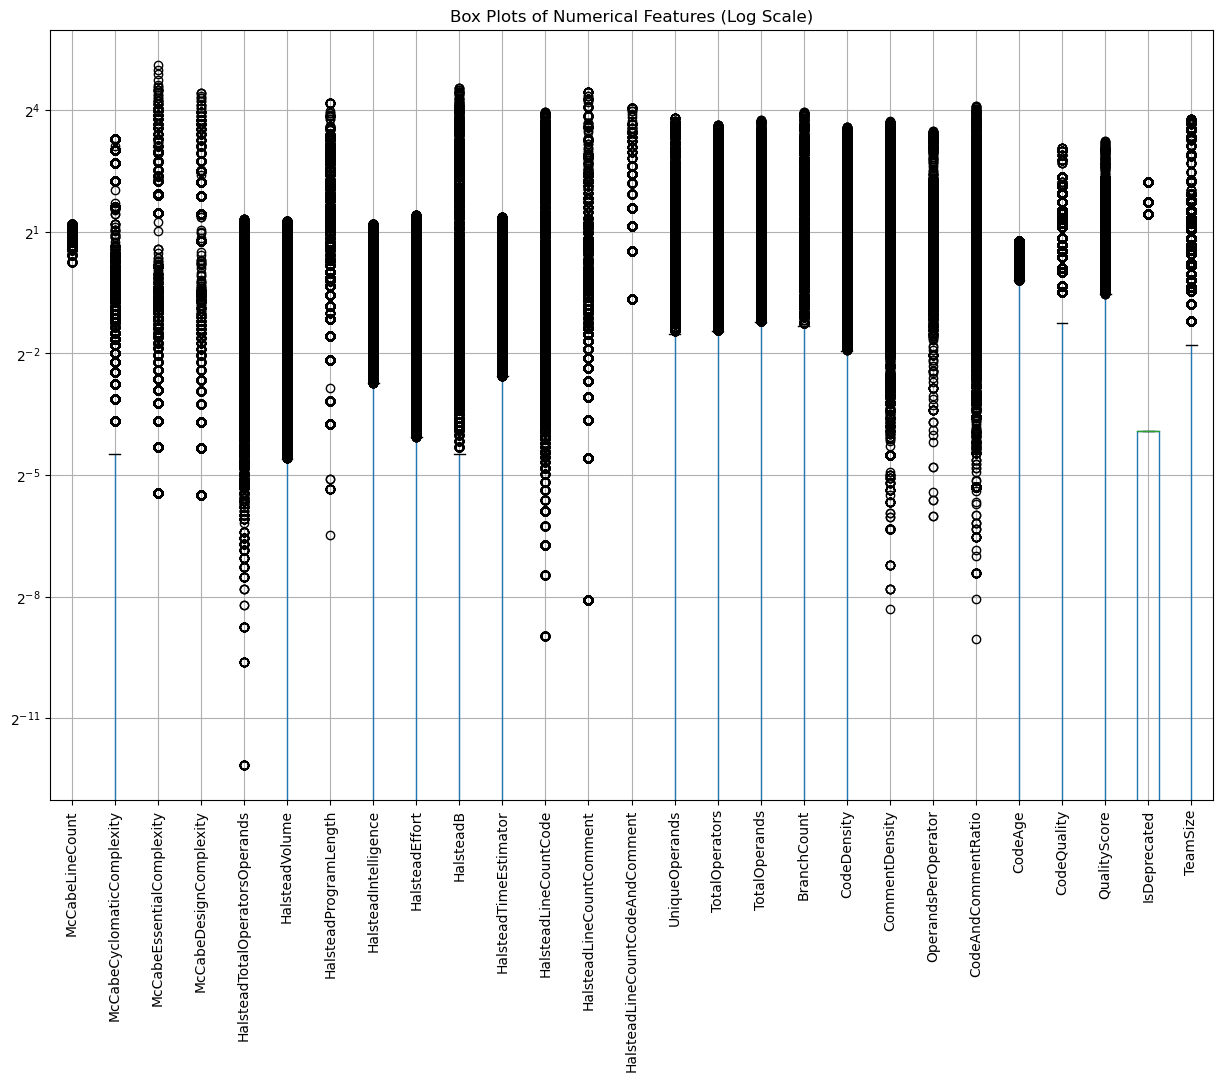

In [133]:
# box plot on a log scale

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df[numerical_cols].boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.yscale('log', base=2)
plt.title('Box Plots of Numerical Features (Log Scale)')
plt.show()

<Axes: >

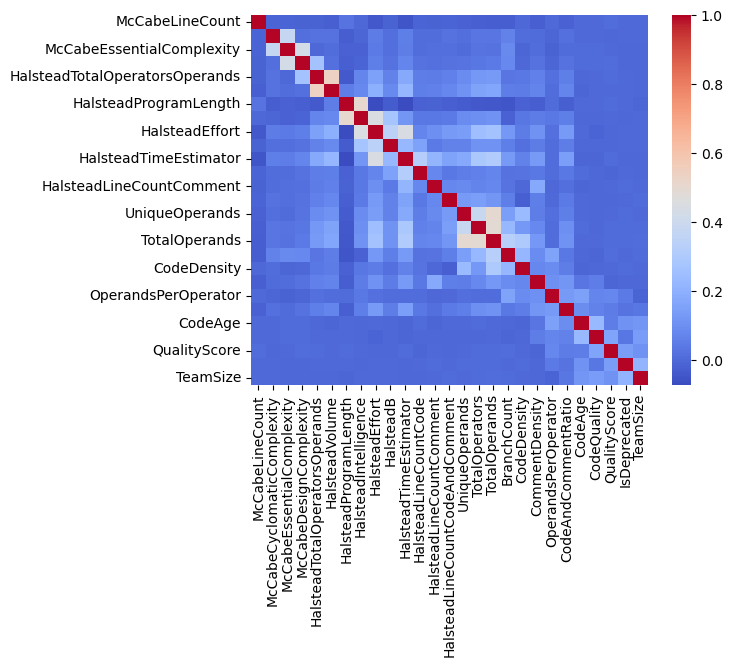

In [134]:
# #heatmap
# plt.figure(figsize=(20,12))
# corr=df.corr()
# mask=np.triu(np.ones_like(corr,dtype=bool))
# sns.heatmap(corr, mask=mask,linewidths=1,annot=True,fmt=".2f",cmap="coolwarm", annot_kws={"size": 10, "color": "black"})
# plt.show()
corr = df[numerical_cols].corr()
sns.heatmap(corr, cmap='coolwarm')

In [135]:
import pandas as pd

#correlation matrix
correlation_matrix = df.corr()
#correlation_matrix = df[numerical_cols].corr()

# Print the correlation matrix
print(correlation_matrix)


                                 McCabeLineCount  McCabeCyclomaticComplexity  \
McCabeLineCount                         1.000000                   -0.012104   
McCabeCyclomaticComplexity             -0.012104                    1.000000   
McCabeEssentialComplexity              -0.012024                    0.373747   
McCabeDesignComplexity                 -0.017495                    0.013642   
HalsteadTotalOperatorsOperands         -0.018053                    0.022860   
HalsteadVolume                         -0.022420                    0.022936   
HalsteadProgramLength                   0.025281                   -0.027481   
HalsteadDifficulty                     -0.034709                    0.036557   
HalsteadIntelligence                   -0.004532                   -0.006018   
HalsteadEffort                         -0.041675                    0.047625   
HalsteadB                              -0.017101                    0.013337   
HalsteadTimeEstimator                  -

In [136]:
#Calculate absolute correlation matrix
corr_matrix = df.corr().abs()

# Create a mask for the upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Mask the upper triangle of the correlation matrix
df1 = corr_matrix.mask(mask)

# Identify columns (features) with correlations above 0.95
df1_drop = [x for x in df1.columns if any(df1[x] > 0.95)]

print("Highly Correlated Features to Drop:", df1_drop)

# Drop the highly correlated features from your original DataFrame
df_cleaned = df.drop(columns=df1_drop)

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Highly Correlated Features to Drop: []
Original DataFrame shape: (62099, 36)
Cleaned DataFrame shape: (62099, 36)


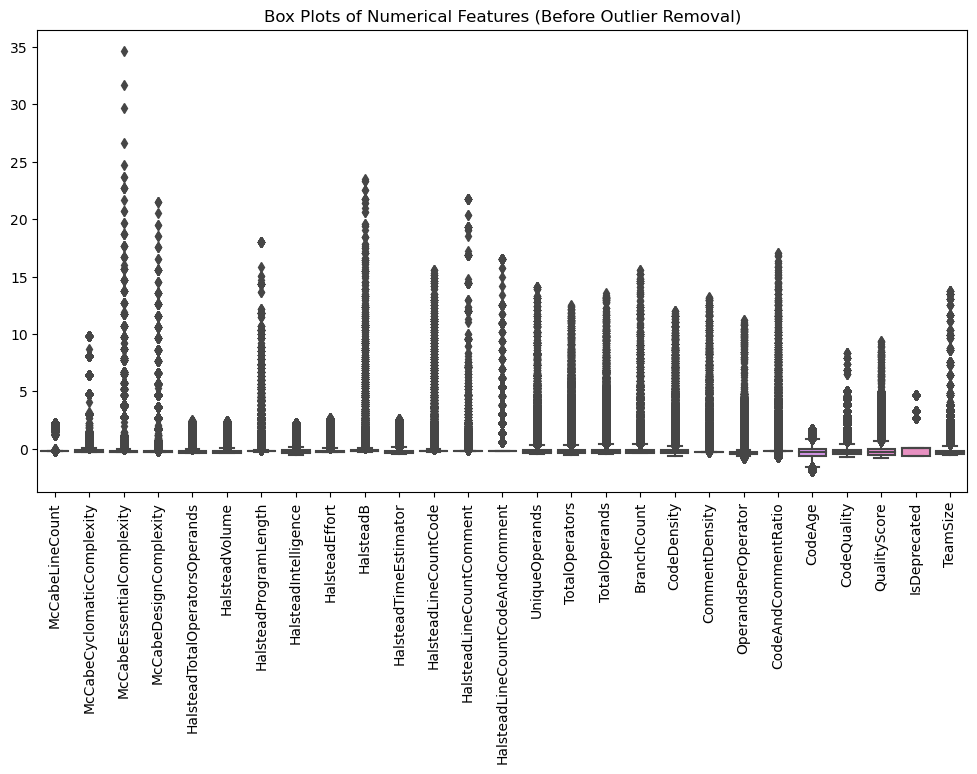

In [137]:
# Before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plots of Numerical Features (Before Outlier Removal)")
plt.xticks(rotation=90)
plt.show()

In [138]:
#Outlier detection
import pandas as pd
import numpy as np
from scipy import stats

# Calculate Z-scores for each numerical feature
z_scores = np.abs(stats.zscore(df[numerical_cols]))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outlier_indices = (z_scores > threshold).any(axis=1)
outliers = df[outlier_indices]

print("Number of outliers detected:", outliers.shape[0])
print(outliers)

# Drop outliers (inplace modification)
df.drop(outliers.index, inplace=True)

print("Shape of DataFrame after removing outliers:", df.shape)

Number of outliers detected: 23796
       McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
1             2.002098                   -0.197120                  -0.143243   
5            -0.167032                   -0.128061                   0.743325   
6            -0.166431                   -0.231649                  -0.226359   
9            -0.167875                   -0.300708                  -0.226359   
17           -0.168718                   -0.266179                  -0.226359   
...                ...                         ...                        ...   
74788        -0.167152                   -0.266179                  -0.226359   
74790        -0.162591                   -0.059002                  -0.115538   
74792        -0.168236                    3.048646                   1.103493   
74793        -0.167875                   -0.266179                   0.743325   
74794         2.052708                    3.048646                   1.103

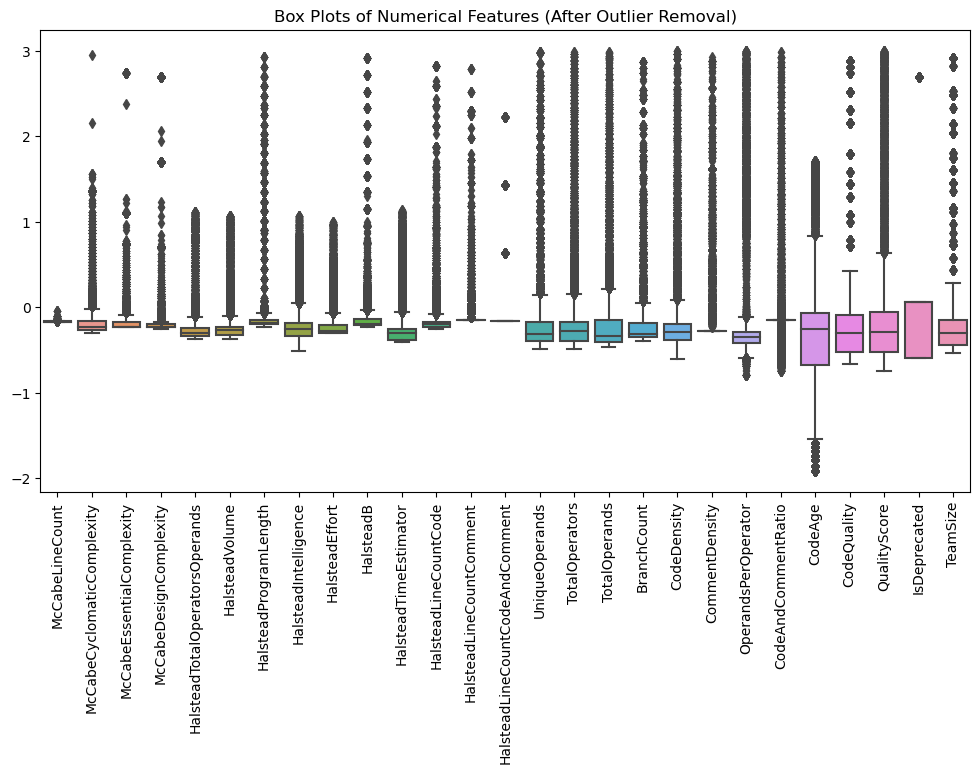

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plots of Numerical Features (After Outlier Removal)")
#plt.yscale('log', base=2)
plt.xticks(rotation=90)
plt.show()

In [140]:
#Isolation forest

# from sklearn.ensemble import IsolationForest
# import numpy as np

# # Create an Isolation Forest model
# model = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# # Fit the model to the numerical features and predict outliers
# df['outlier'] = model.fit_predict(df[numerical_cols])

# # Print the number of outliers detected
# print("Number of outliers detected:", (df['outlier'] == -1).sum())

# # # Optionally, display the rows identified as outliers
# print(df[df['outlier'] == -1])

# df.drop(df[df['outlier'] == -1].index, inplace=True)

In [141]:
df['defects'].head()

0    False
2    False
3    False
4    False
7    False
Name: defects, dtype: bool

Feature ranking:
1. feature McCabeLineCount (0.10021919658558114)
2. feature QualityScore (0.04857155657837592)
3. feature CodeAge (0.042217453045950495)
4. feature HalsteadTotalOperatorsOperands (0.04088902749576158)
5. feature HalsteadEffort (0.03930373665583745)
6. feature McCabeCyclomaticComplexity (0.038851863249548556)
7. feature HalsteadIntelligence (0.03563944795699927)
8. feature HalsteadProgramLength (0.03257475026584339)
9. feature HalsteadTimeEstimator (0.03254310242304438)
10. feature HalsteadVolume (0.03179349750370882)
11. feature ComplexityEfficiency (0.03166392646347505)
12. feature TotalOperands (0.03165007113243538)
13. feature TeamSize (0.031558774706038926)
14. feature CodeQuality (0.03129705425900772)
15. feature OperandsPerOperator (0.03097916050928477)
16. feature BranchCount (0.03001588855389686)
17. feature UniqueOperands (0.029708167409829234)
18. feature TotalOperators (0.029461448101768963)
19. feature HalsteadDifficulty (0.02896771491748028)
20. feature Op

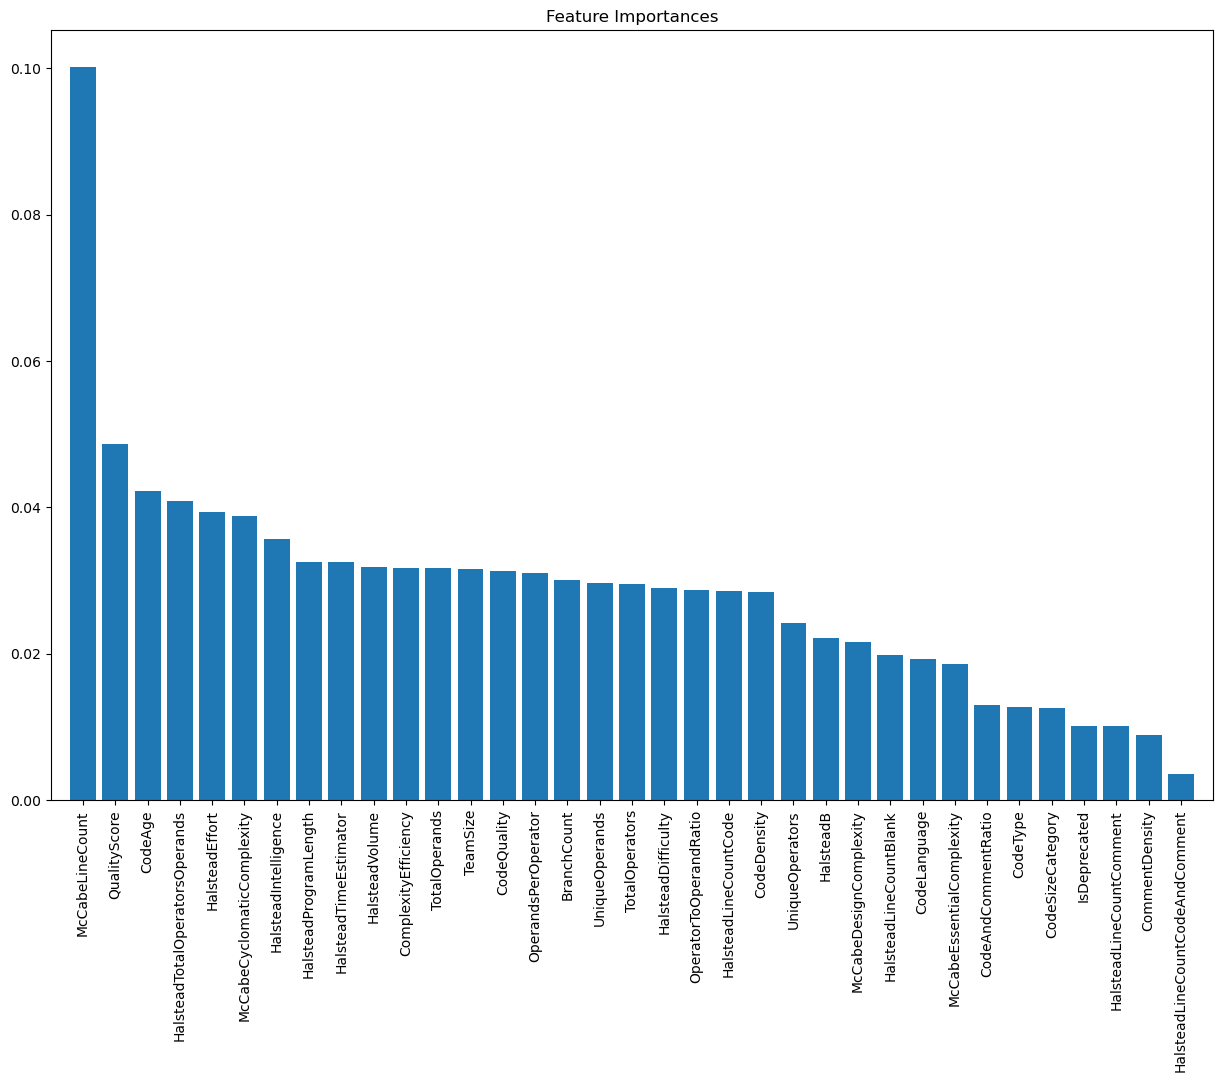

In [142]:
# #Find important features

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Preprocessing
# Encode categorical variables
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Normalize numerical variables
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Assuming 'defects' is the target variable
X = df.drop(columns=['defects'])
y = df['defects']

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

# Visualize the feature importances
plt.figure(figsize=(15, 10))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


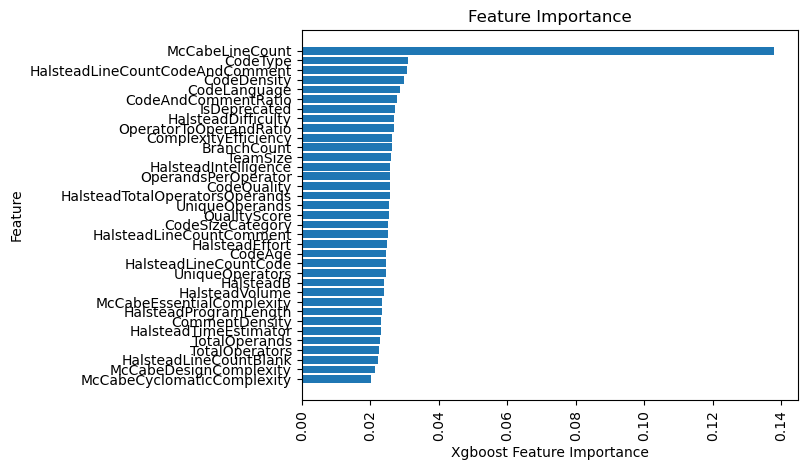

In [143]:
#!pip install xgboost
#!pip install shap

import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt


# Assuming 'defects' is the target variable
X = df.drop(columns=['defects'])
y = df['defects']
feature_names = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost regression model (adjust parameters as needed)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# 1. Feature Importance (Global)
importance = model.feature_importances_
sorted_idx = importance.argsort()
plt.barh(feature_names[sorted_idx], importance[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.xticks(rotation=90)
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# # 2. Feature Importance (Local)
# explainer = shap.Explainer(model)
# shap_values = explainer(X_train)
# shap.plots.bar(shap_values)
# plt.show()

# # 2. Tree Visualization
# # Visualize a single tree (e.g., the first tree)
# xgb.plot_tree(model, num_trees=0)
# plt.show()

# # 3. SHAP (Shapley Additive Explanations)
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)


# Summarize the effects of all features
#shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar')
#plt.show()

# # Explain a single prediction (e.g., the first instance in the test set)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=feature_names)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8364443284166558
Top 15 features:
1. McCabeLineCount (0.10021919658558114)
2. QualityScore (0.04857155657837592)
3. CodeAge (0.042217453045950495)
4. HalsteadTotalOperatorsOperands (0.04088902749576158)
5. HalsteadEffort (0.03930373665583745)
6. McCabeCyclomaticComplexity (0.038851863249548556)
7. HalsteadIntelligence (0.03563944795699927)
8. HalsteadProgramLength (0.03257475026584339)
9. HalsteadTimeEstimator (0.03254310242304438)
10. HalsteadVolume (0.03179349750370882)
11. ComplexityEfficiency (0.03166392646347505)
12. TotalOperands (0.03165007113243538)
13. TeamSize (0.031558774706038926)
14. CodeQuality (0.03129705425900772)
15. OperandsPerOperator (0.03097916050928477)


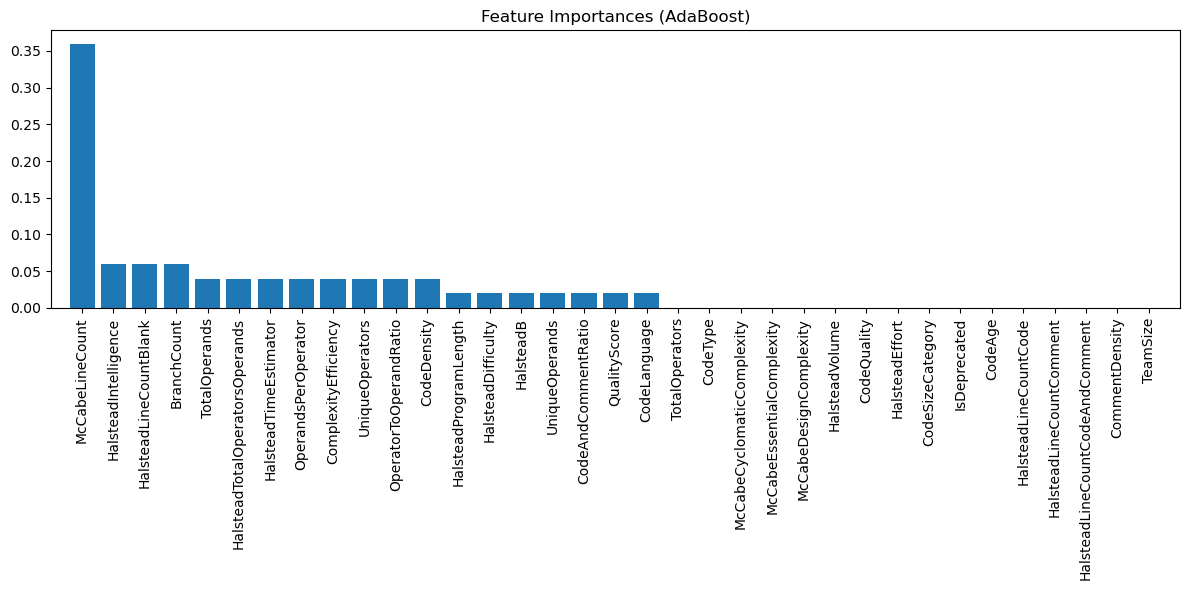

In [144]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'defects' is the target variable and you've done necessary preprocessing
X = df.drop(columns=['defects'])
y = df['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree as the base estimator (you can customize it)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# # Get feature importances
# importances = model.feature_importances_
# feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print top k features (e.g., top 10)
k = 15
print("Top {} features:".format(k))
for i in range(k):
    print("{}. {} ({})".format(i + 1, feature_names[indices[i]], importances[indices[i]]))

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (AdaBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

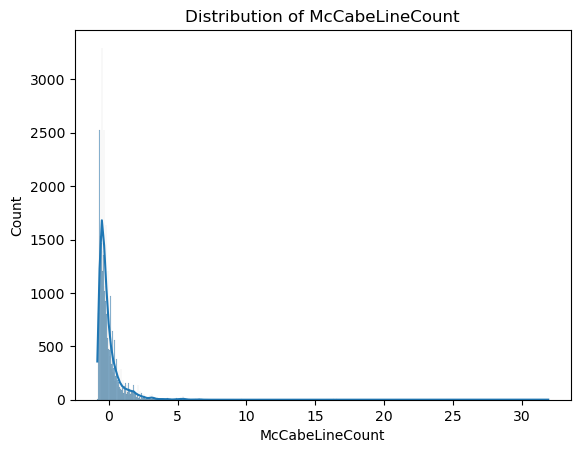

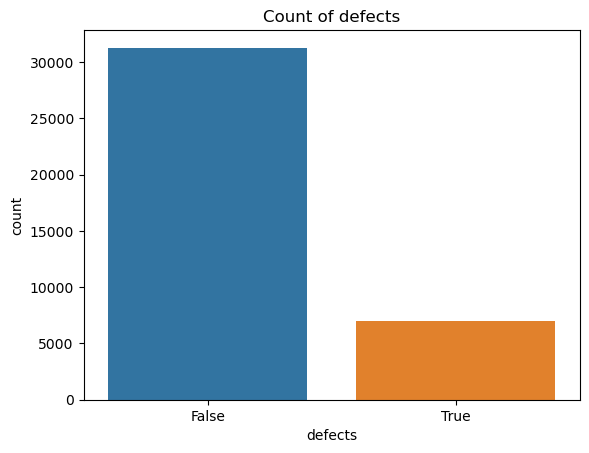

In [145]:
# Univaritate analysis
import seaborn as sns


# For a numerical feature
sns.histplot(df['McCabeLineCount'], kde=True)
plt.title("Distribution of McCabeLineCount")
plt.show()

# For a categorical feature
sns.countplot(x='defects', data=df)
plt.title("Count of defects")
plt.show()


Descriptive Statistics for McCabeLineCount:
count    3.830300e+04
mean    -4.240662e-15
std      1.000013e+00
min     -8.218793e-01
25%     -5.113111e-01
50%     -2.941514e-01
75%      1.395815e-01
max      3.189944e+01
Name: McCabeLineCount, dtype: float64


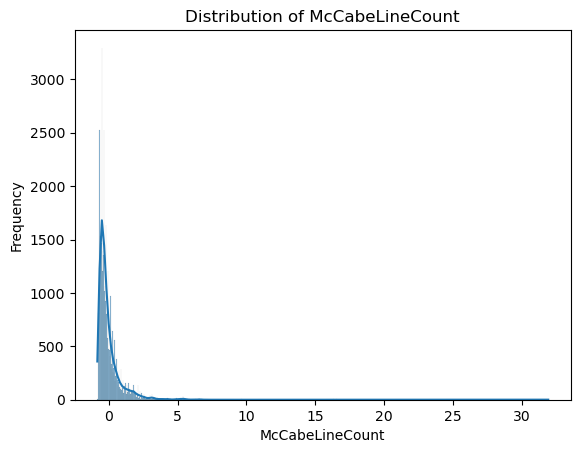

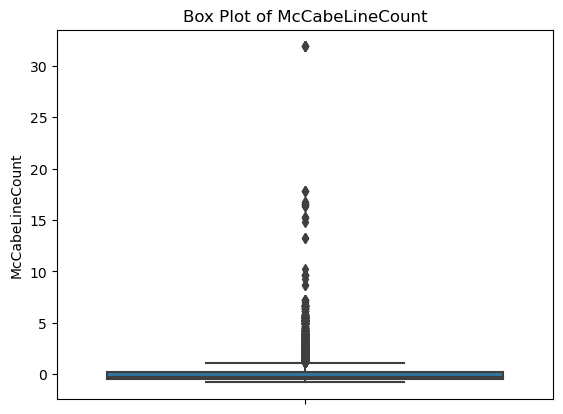


Descriptive Statistics for QualityScore:
count    3.830300e+04
mean     5.936185e-18
std      1.000013e+00
min     -9.116850e-01
25%     -5.626059e-01
50%     -2.118279e-01
75%      1.466685e-01
max      4.850648e+00
Name: QualityScore, dtype: float64


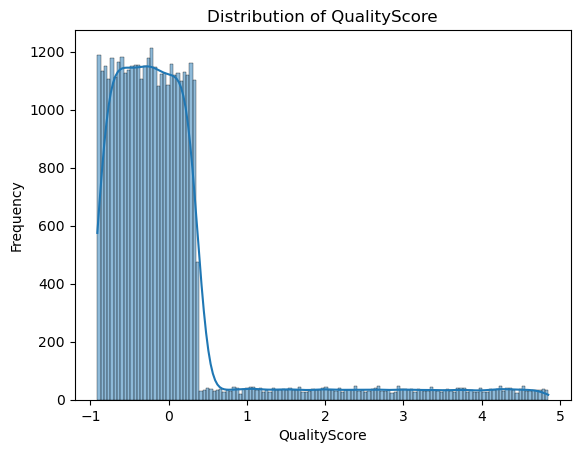

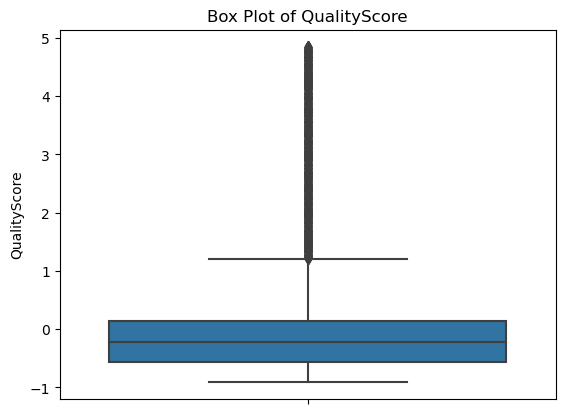


Descriptive Statistics for HalsteadEffort:
count    3.830300e+04
mean     1.053673e-16
std      1.000013e+00
min     -5.432951e-01
25%     -5.062054e-01
50%     -3.958019e-01
75%      3.246294e-02
max      7.214189e+00
Name: HalsteadEffort, dtype: float64


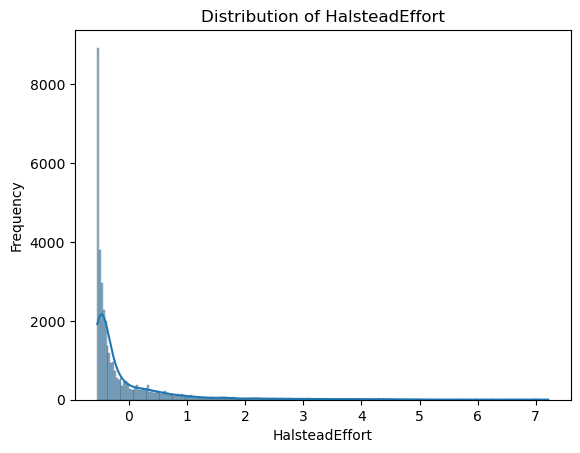

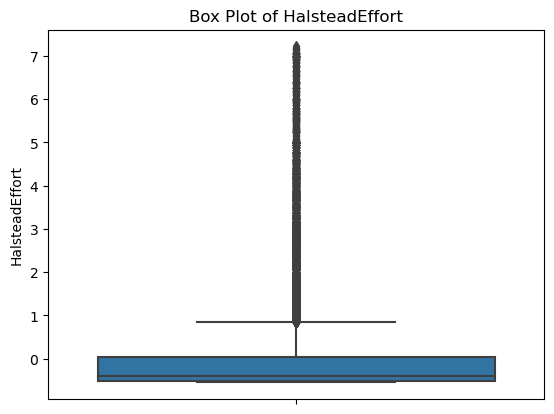


Descriptive Statistics for HalsteadIntelligence:
count    3.830300e+04
mean    -8.273557e-17
std      1.000013e+00
min     -1.318339e+00
25%     -5.065942e-01
50%     -1.360202e-01
75%      2.098775e-01
max      5.994482e+00
Name: HalsteadIntelligence, dtype: float64


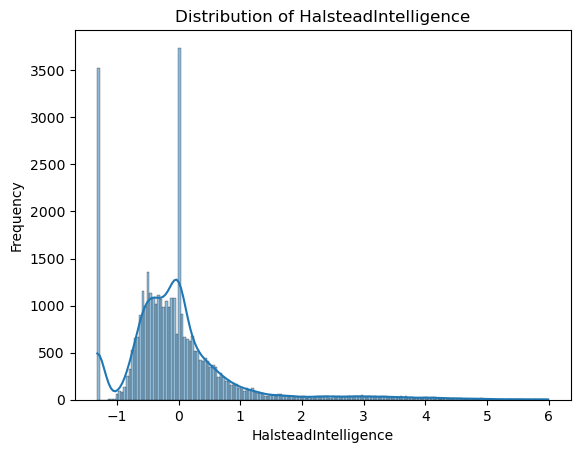

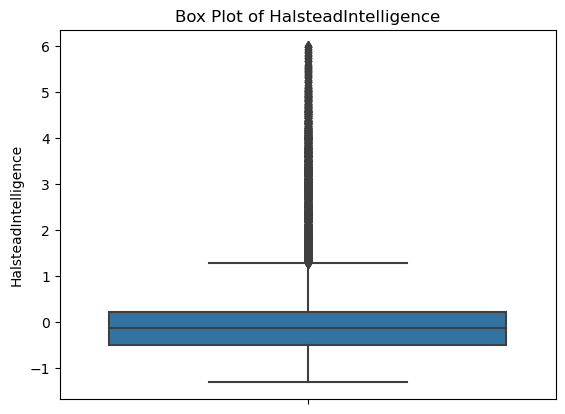


Descriptive Statistics for McCabeCyclomaticComplexity:
count    3.830300e+04
mean    -1.351410e-16
std      1.000013e+00
min     -5.881959e-01
25%     -4.280817e-01
50%     -2.679675e-01
75%      5.226086e-02
max      1.446254e+01
Name: McCabeCyclomaticComplexity, dtype: float64


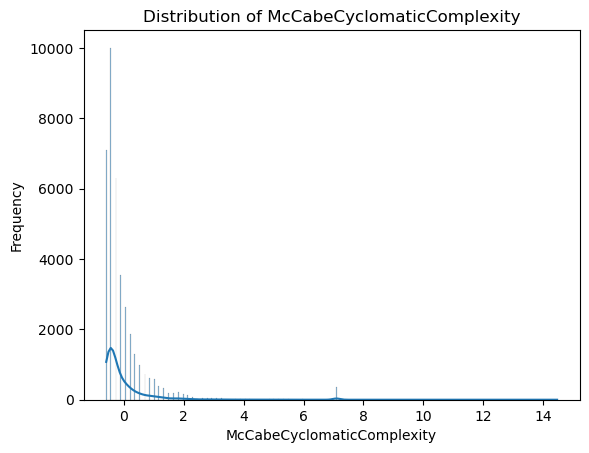

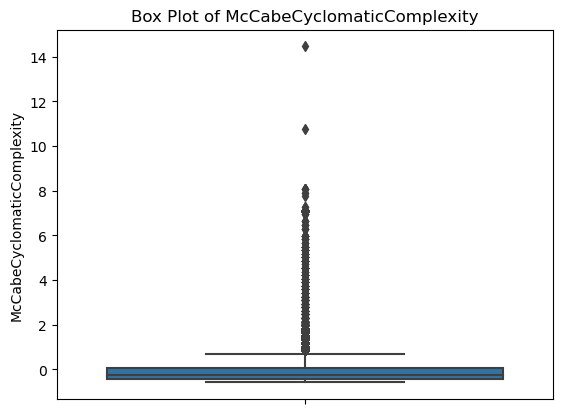


Descriptive Statistics for CodeAge:
count    3.830300e+04
mean     1.855058e-17
std      1.000013e+00
min     -2.398034e+00
25%     -4.996148e-01
50%      1.381023e-01
75%      4.269578e-01
max      3.153215e+00
Name: CodeAge, dtype: float64


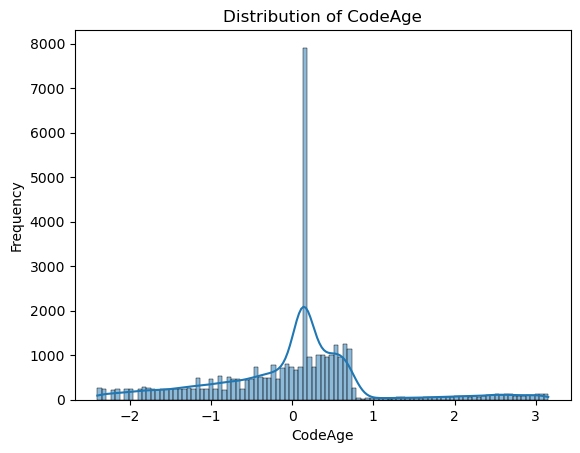

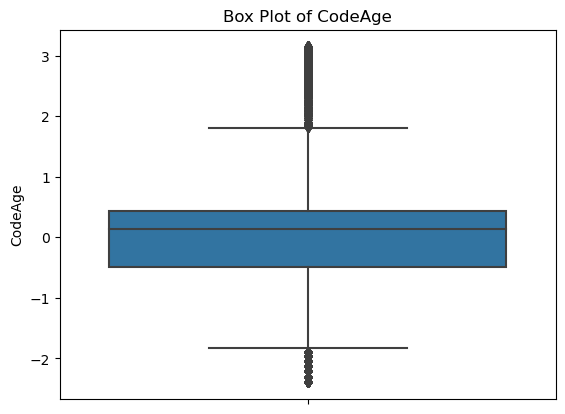

In [146]:
# Picking top 5 features based on Random forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing these features

features = ['McCabeLineCount', 'QualityScore', 'HalsteadEffort', 'HalsteadIntelligence', 'McCabeCyclomaticComplexity','CodeAge']

for feature in features:
    # Descriptive statistics
    print(f"\nDescriptive Statistics for {feature}:")
    print(df[feature].describe())

    # Histogram
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

    # Box plot
    plt.figure()
    sns.boxplot(y=df[feature])
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    plt.show()


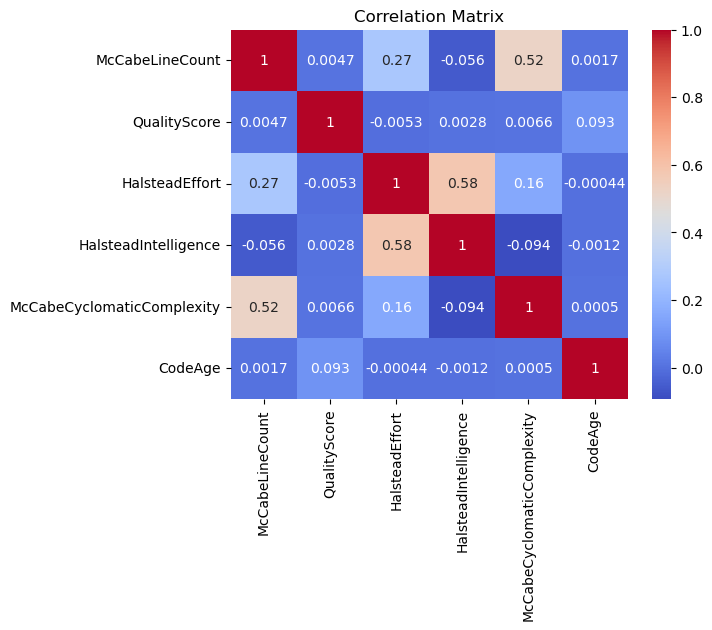

In [147]:
# Correlation matrix
correlation_matrix = df[features].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

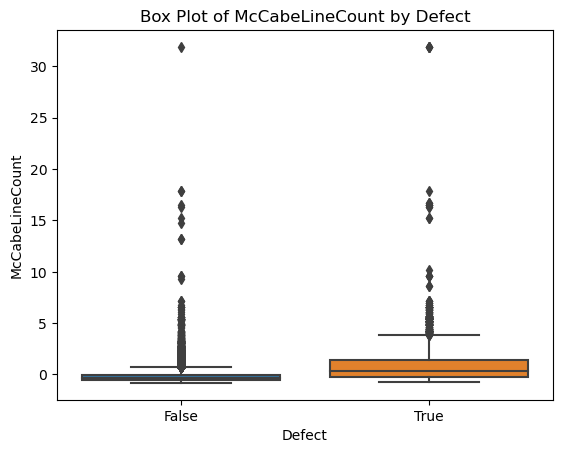

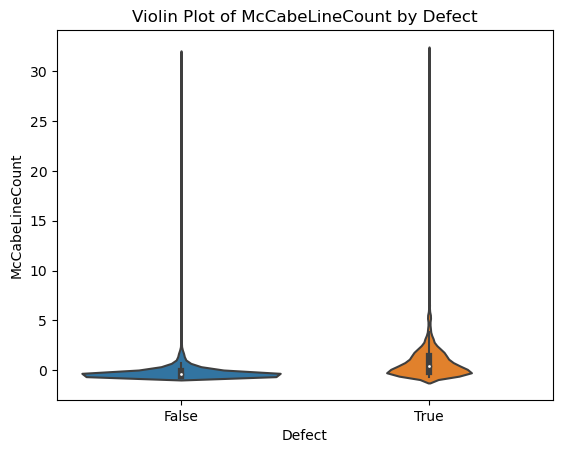

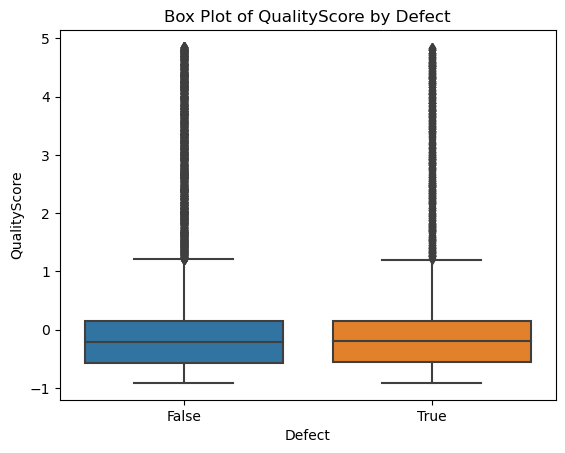

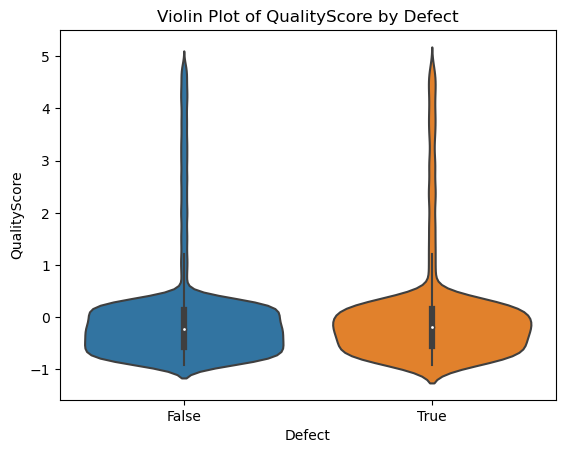

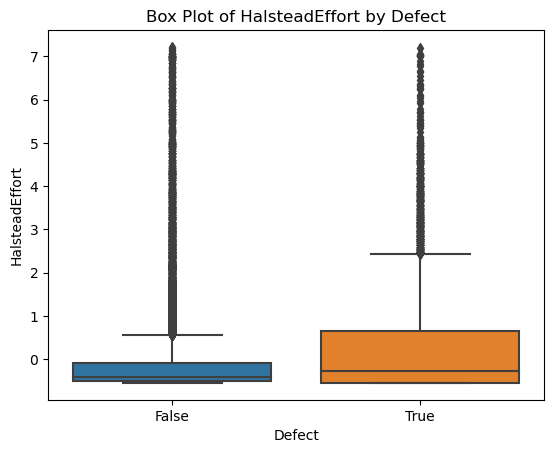

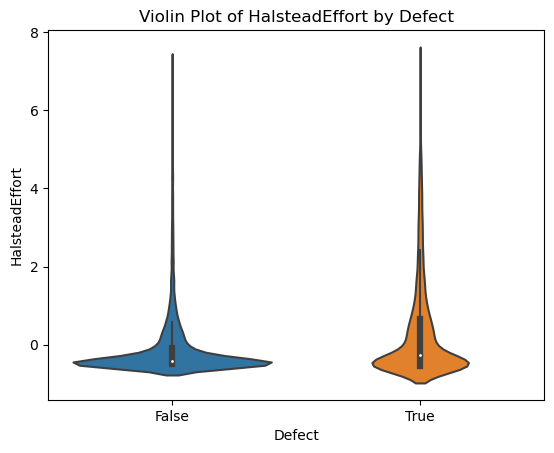

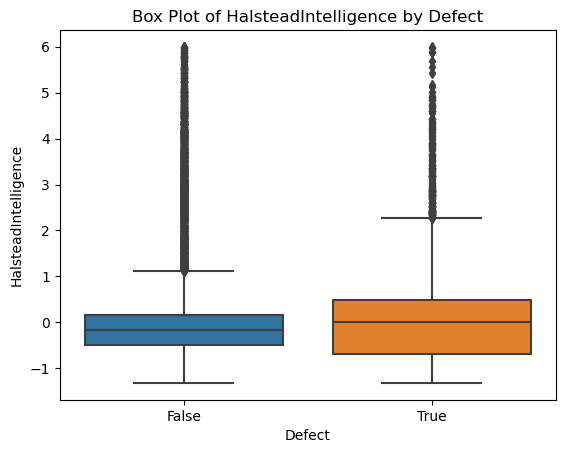

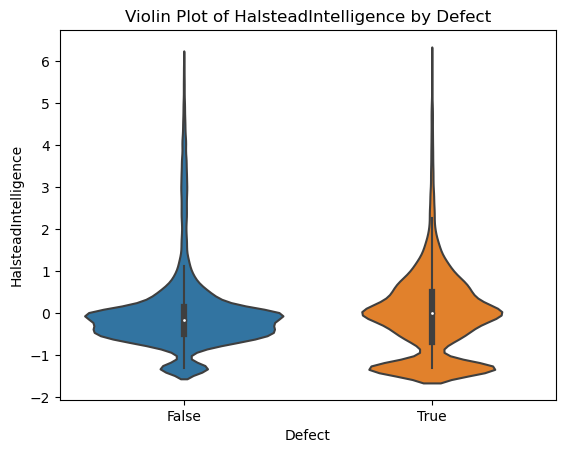

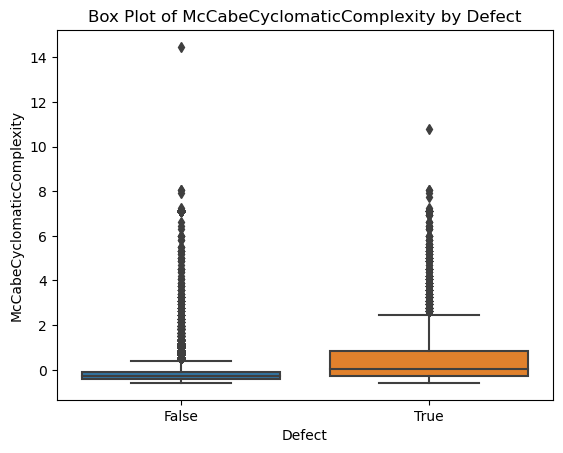

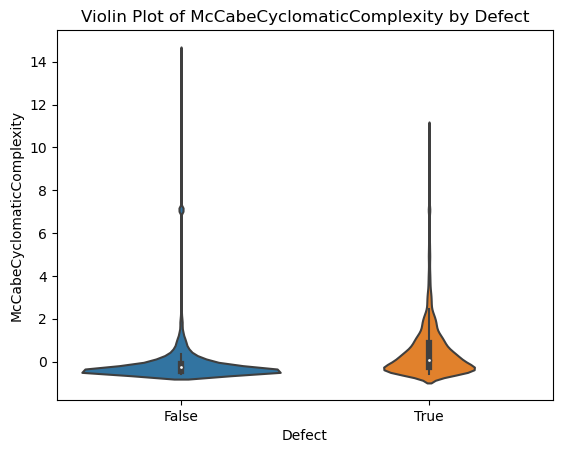

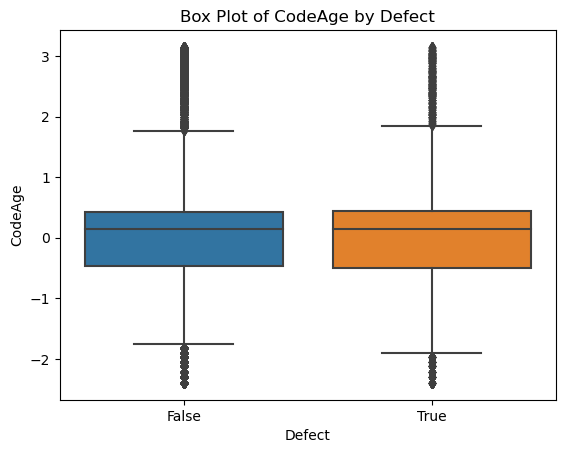

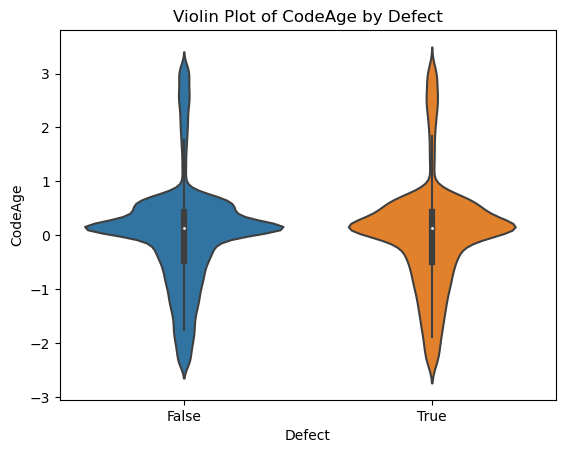

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#features = ['McCabeLineCount', 'QualityScore', 'HalsteadEffort', 'HalsteadTotalOperatorsOperands', 'McCabeCyclomaticComplexity']

for feature in features:
    # Box plot
    plt.figure()
    sns.boxplot(x='defects', y=feature, data=df)
    plt.title(f"Box Plot of {feature} by Defect")
    plt.xlabel("Defect")
    plt.ylabel(feature)
    plt.show()

    # Violin plot
    plt.figure()
    sns.violinplot(x='defects', y=feature, data=df)
    plt.title(f"Violin Plot of {feature} by Defect")
    plt.xlabel("Defect")
    plt.ylabel(feature)
    plt.show()

In [149]:
#  #Function to get pairs of moderately correlated features
# def get_moderately_correlated_features(corr_matrix, lower_threshold=0.5, upper_threshold=0.8):
#     correlated_pairs = []
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if lower_threshold < abs(corr_matrix.iloc[i, j]) < upper_threshold:
#                 correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
#     return correlated_pairs

# # Get and print moderately correlated feature pairs (correlation between 0.5 and 0.8)
# moderate_threshold_pairs = get_moderately_correlated_features(correlation_matrix, lower_threshold=0.5, upper_threshold=0.8)
# print("Features with correlation values between 0.5 and 0.8:")
# for pair in moderate_threshold_pairs:
#     print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


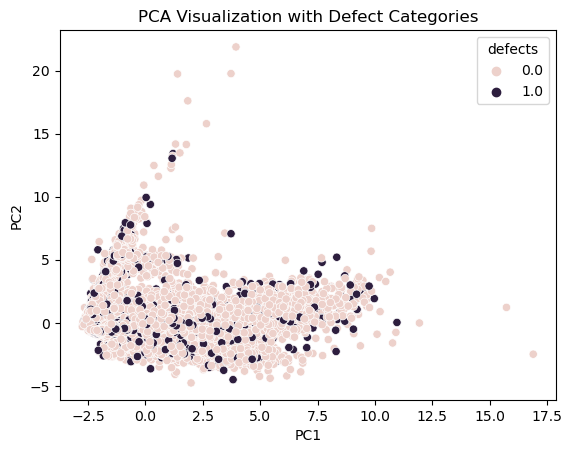

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the numerical features

X = df.drop(columns=['defects'])
#y = df['defects']

# Scale the numerical features (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# # Create a new DataFrame with principal components and defect
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#pca_df['defects'] = df['defects']

# Visualize with scatter plot
plt.figure()
sns.scatterplot(x='PC1', y='PC2', hue=df['defects'], data=pca_df)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Visualization with Defect Categories")
plt.show()

In [151]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

# # Assuming 'df' is your DataFrame and 'features' is a list of numerical features
# features = ['McCabeLineCount', 'QualityScore', 'HalsteadEffort',
#             'HalsteadTotalOperatorsOperands', 'McCabeCyclomaticComplexity']

# # Scale the features (important for t-SNE)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[features])

# # Apply t-SNE (reduce to 2 dimensions)
# tsne = TSNE(n_components=2, random_state=10)  # Adjust random_state for reproducibility
# #tsne_components = tsne.fit_transform(scaled_data)

# # # Create a DataFrame with t-SNE components
# # tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# # # Optionally, add other relevant columns (e.g., 'defect') for visualization
# # tsne_df['defect'] = df['defect']

# # # Visualize with scatter plot
# # plt.figure()
# # sns.scatterplot(x='TSNE1', y='TSNE2', hue='defect', data=tsne_df)  # Color points by 'defect' if available
# # plt.title("t-SNE Visualization")
# # plt.show()

In [152]:
from sklearn.manifold import Isomap

# # Create an Isomap object
# isomap = Isomap(n_components=2, n_neighbors=10)  # Adjust n_neighbors as needed

# # Apply Isomap to the scaled data
# X_isomap = isomap.fit_transform(scaled_data)

# # Create a DataFrame for visualization
# isomap_df = pd.DataFrame(data=X_isomap, columns=['Isomap1', 'Isomap2'])
# isomap_df['defects'] = y

# # Visualize the Isomap embedding
# plt.figure()
# sns.scatterplot(x='Isomap1', y='Isomap2', hue=df['defects'], data=isomap_df, palette='viridis')
# plt.title("Isomap Embedding of Digits Dataset")
# plt.show()

In [153]:
# from imblearn.over_sampling import SMOTE

# X = df.drop(columns=['defects'])
# y = df['defects']

# oversample = SMOTE()
# X_resampled, y_resampled = oversample.fit_resample(X, y)


# sns.countplot(x=y_resampled)
# plt.title('Class Distribution After SMOTE')
# plt.show()


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# # Assuming 'defect' is binary (0 or 1)
X_resampled = df.drop(columns=['defects'])
y_resampled = df['defects']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Print coefficients
print("Coefficients:", model.coef_)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Coefficients: [[ 9.49162153e-01  9.83495182e-03  3.58870470e-04 -1.46837491e-02
  -2.87683707e-02  4.25199116e-02 -7.29017866e-02 -8.84043920e-02
   1.28169954e-02  8.72871561e-02 -4.26761451e-02  4.56254034e-02
  -2.16648396e-02 -1.66264959e-02  3.86360429e-02  3.33833985e-02
  -2.59104941e-02  2.06444647e-02  5.46651472e-02  4.77993073e-04
   1.07491478e-01 -6.13871664e-02  1.05956461e-02  3.99407550e-02
  -5.70107469e-03 -1.20237874e-02  2.97284744e-02 -2.22444642e-02
   2.47619788e-02  1.49927654e-02  1.06310514e-02 -1.36591861e-02
   3.06418606e-02 -2.32455421e-02  1.57138285e-04]]
Confusion Matrix:
 [[12272   290]
 [ 2125   635]]

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.98      0.91     12562
        True       0.69      0.23      0.34      2760

    accuracy                           0.84     15322
   macro avg       0.77      0.60      0.63     15322
weighted avg       0.82      0.84      0.81     15322



In [155]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.7709176347735283

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.85      0.86      6230
        True       0.40      0.43      0.41      1431

    accuracy                           0.77      7661
   macro avg       0.63      0.64      0.64      7661
weighted avg       0.78      0.77      0.77      7661



In [186]:
df_test = pd.read_csv('test_data.csv')
column_data = df_test['id']
column_df = pd.DataFrame(column_data)
column_df.to_csv('submissions.csv', index=False)  # Replace 'column_data.csv' with your desired file name

df_test.drop('id', axis=1, inplace=True)
df_test.shape

(32056, 35)

In [187]:

# Define threshold to drop columns with more than 50% missing values
threshold = len(df_test) * 0.5

# Drop columns with excessive missing values
df_test_dropped = df_test.dropna(thresh=threshold, axis=1)

# Fill missing values in numerical columns with the median
test_numerical_cols = df_test_dropped.select_dtypes(include=['float64', 'int64']).columns
df_test_dropped[test_numerical_cols] = df_test_dropped[test_numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)
df_test.describe()

# pre - processing
test_numerical_cols_arr = ["HalsteadDifficulty", "HalsteadLineCountBlank", "UniqueOperators", "OperatorToOperandRatio", "ComplexityEfficiency", "CodeAndCommentRatio"]

def test_convert_to_float(value):
        df_test[value] = df_test[value].astype(float)
        df_test[value].replace([np.inf, -np.inf], np.nan, inplace=True)
        df_test[value].replace('nan', np.nan, inplace=True)
        df_test[value].replace('NAN', np.nan, inplace=True)
        df_test[value].fillna(df_test[value].median(), inplace=True)

for col in test_numerical_cols:
    test_convert_to_float(col)

for i in test_numerical_cols_arr:
  test_convert_to_float(i)

# Fill missing values with the mode for each categorical column
#categorical_cols = df_test.select_dtypes(include=['object', 'category', 'bool']).columns
test_categorical_cols = df_test.select_dtypes(include=['object', 'category']).columns
print(test_categorical_cols)

# Replace missing values in categorical columns with the mode
for column in test_categorical_cols:
    df_test[column].replace('nan', np.nan, inplace=True)
    df_test[column].replace('NAN', np.nan, inplace=True)
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)
    #df_test.dropna(inplace=True)

print(df_test.isnull().sum())

Index(['CodeLanguage', 'CodeSizeCategory', 'CodeType'], dtype='object')
McCabeLineCount                    0
McCabeCyclomaticComplexity         0
McCabeEssentialComplexity          0
McCabeDesignComplexity             0
HalsteadTotalOperatorsOperands     0
HalsteadVolume                     0
HalsteadProgramLength              0
HalsteadDifficulty                 0
HalsteadIntelligence               0
HalsteadEffort                     0
HalsteadB                          0
HalsteadTimeEstimator              0
HalsteadLineCountCode              0
HalsteadLineCountComment           0
HalsteadLineCountBlank             0
HalsteadLineCountCodeAndComment    0
UniqueOperators                    0
UniqueOperands                     0
TotalOperators                     0
TotalOperands                      0
BranchCount                        0
CodeDensity                        0
OperatorToOperandRatio             0
CommentDensity                     0
ComplexityEfficiency               0
Ope

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [188]:
def test_remove_nan(column):

  df_test[column].replace('nan', np.nan, inplace=True)
  df_test[column].replace('NAN', np.nan, inplace=True)
  df_test[column].fillna(df_test[column].mode()[0], inplace=True)
  #df.dropna(inplace=True)

#categorical_feature_arr = ["defects","CodeType", "CodeSizeCategory","CodeLanguage"]

for i in test_categorical_cols:
  test_remove_nan(i)

def drop_na(df_test, col):
  df_test[col].fillna(df_test[col].mode()[0], inplace=True)
  df.dropna(inplace=True)
  df_test = df_test.dropna(subset=[col])

#for i in categorical_cols:
  #drop_na(df, i)
    
# Fill missing values with the mean
df_test[test_numerical_cols] = df_test[test_numerical_cols].fillna(df_test[test_numerical_cols].median())
df_test.head(20)

# Pre-processing - to lower
def test_to_lower(cols):
  df_test[cols]= df_test[cols].astype(str)
  df_test[cols]= df_test[cols].str.lower()
  df_test[cols].head()

for i in test_categorical_cols:
    test_to_lower(i)

def test_value_counts(cols):
  df_test[cols].value_counts()
  print(df_test[cols].value_counts())

for i in test_categorical_cols:
  test_value_counts(i)

def test_value_counts_plot(cols):
  df_test[cols].value_counts(normalize=False).plot(kind="bar")
  #plt.ylim(0, 20000)
  plt.show()

#test_value_counts_plot('defects')

# One-Hot Encoding for categorical columns
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#df_encoded.head()

from sklearn.preprocessing import LabelEncoder

def test_label_encoding(value):
   le=LabelEncoder()
   df_test[value]=le.fit_transform(df_test[value])

for i in test_categorical_cols:
  test_label_encoding(i)

from sklearn.preprocessing import StandardScaler  # Import StandardScaler
# Normalize numerical variables
scaler = StandardScaler()
df_test[df_test.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df_test.select_dtypes(include=[np.number]))

CodeLanguage
java          6455
c++           6446
python        6434
ruby          6421
javascript    6300
Name: count, dtype: int64
CodeSizeCategory
large     15139
medium     8467
small      8450
Name: count, dtype: int64
CodeType
library                13632
desktop application     9247
web application         9177
Name: count, dtype: int64


In [189]:
#Picking features with highest variability
high_variability_features = ["McCabeLineCount", "HalsteadEffort", "HalsteadVolume", "HalsteadTotalOperatorsOperands","HalsteadTimeEstimator","HalsteadIntelligence","CodeAge"]
# Skewness
def test_calculate_skewness(column):
  skewness_value = df_test[column].skew()
  print(f"Skewness of {column}: {skewness_value}")

for i in high_variability_features:
  test_calculate_skewness(i)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation (adding 1 to avoid log(0) issues)
for feature in high_variability_features:
    df_test[feature] = np.log1p(df_test[feature])

# Calculate skewness for each transformed feature
test_skewness_after_log = df_test[high_variability_features].skew()

# Print the results
print(test_skewness_after_log)

#Outlier detection
import pandas as pd
import numpy as np
from scipy import stats

# Calculate Z-scores for each numerical feature
z_scores = np.abs(stats.zscore(df_test[test_numerical_cols]))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outlier_indices = (z_scores > threshold).any(axis=1)
outliers = df_test[outlier_indices]

print("Number of outliers detected:", outliers.shape[0])
print(outliers)

# Drop outliers (inplace modification)
#df_test.drop(outliers.index, inplace=True)

print("Shape of DataFrame after removing outliers:", df_test.shape)

Skewness of McCabeLineCount: 21.52143160485699
Skewness of HalsteadEffort: 121.6320151431817
Skewness of HalsteadVolume: 156.96283529345047
Skewness of HalsteadTotalOperatorsOperands: 134.89778321627676
Skewness of HalsteadTimeEstimator: 133.69609534783726
Skewness of HalsteadIntelligence: 40.33200632916248
Skewness of CodeAge: 37.76060168910325
McCabeLineCount                    6.010329
HalsteadEffort                    17.651145
HalsteadVolume                    18.789192
HalsteadTotalOperatorsOperands    21.226412
HalsteadTimeEstimator             18.744025
HalsteadIntelligence               6.895351
CodeAge                            4.328179
dtype: float64
Number of outliers detected: 5486
       McCabeLineCount  McCabeCyclomaticComplexity  McCabeEssentialComplexity  \
2            -0.141085                    4.228819                   0.951754   
17            1.230317                   -0.140968                  -0.064976   
29           -0.141415                    0.900536  

In [190]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['defects'])
y = df['defects']

# Assuming you have X_train, X_test, y_train, y_test
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
rf_classifier.fit(X, y)





RandomForestClassifier(random_state=42)

In [191]:
df_copy.head()

id  McCabeLineCount  McCabeCyclomaticComplexity  \
0  56120                7                           1   
1  64981                8                           3   
2  42984               37                         392   
3  54865               30                           4   
4  79712               19                           6   

   McCabeEssentialComplexity  McCabeDesignComplexity  \
0                          1                     1.0   
1                          1                     NaN   
2                        343                     3.0   
3                          1                     NaN   
4                          1                     2.0   

   HalsteadTotalOperatorsOperands  HalsteadVolume  HalsteadProgramLength  \
0                              14           46.51                   0.38   
1                              25          100.00                   0.11   
2                              89          461.25                   0.06   
3                              77          338.58                   0.04   
4                              56          233.52                   0.06   

  HalsteadDifficulty  HalsteadIntelligence  ...  OperandsPerOperator  \
0               2.67                 19.93  ...             3.750000   
1               8.75                 12.00  ...             0.666667   
2              17.27                 26.45  ...             0.780000   
3              25.38                 11.04  ...             0.456522   
4               17.5                   NaN  ...             0.600000   

   CodeAndCommentRatio  CodeAge  CodeLanguage  CodeSizeCategory  \
0                  inf    118.0          JAVA             Small   
1                  inf     72.0           C++            Medium   
2                 14.0      NaN          Ruby               NaN   
3                 30.0     29.0          java             Small   
4                  7.0     27.0        Python            Medium   

          CodeType  CodeQuality QualityScore  IsDeprecated  TeamSize  
0          Library            4     0.461219           0.0        10  
1          Library            3     0.396717           1.0         5  
2  Web Application            1     0.430680           0.0         2  
3          Library           10     0.362085           0.0         6  
4          Library            7     0.199284           1.0         1  

[5 rows x 36 columns]

In [195]:
#from sklearn.metrics import accuracy_score, classification_report

#features = df_test.columns
#X_test = features
#X_test = df_test.columns
df_test.head()

y_pred = rf_classifier.predict(df_test)
print(len(y_pred))

import csv

# Assuming 'new_column_data' is a list of values you want to add as a new column
# and 'existing_csv_file.csv' is the path to your existing CSV file

with open('submissions.csv', 'r') as infile, open('temp_file.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    # Write header (if needed)
    header = next(reader)  # Read the existing header
    header.append('defects')  # Add the new column name
    writer.writerow(header)
    
    # Append data row by row
    for row, new_value in zip(reader, y_pred):
        row.append(new_value)
        writer.writerow(row)

# Replace the original CSV file with the updated one
import os
os.replace('temp_file.csv', 'submissions.csv')

# Assuming 'df' is your original DataFrame and 'df_copy' is the modified copy
#test_ids = df[df['id'].isin(df_copy['id'])]['id']



# # Store IDs of the test set
# test_ids = df.loc[df_copy['id'], 'id']

# # Create a DataFrame with IDs and their corresponding predictions
# predictions_df = pd.DataFrame({'id': test_ids, 'defects': y_pred})

#predictions_df.to_csv('submissions.csv', index=False)
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", report)

32056
